In [17]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from collections import Counter
import re

# Configurações para visualização
plt.style.use('default')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Configurações do display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

Arquivo Youtube01-Psy.csv carregado: 350 linhas - Vídeo: Youtube1-Psy
Arquivo Youtube02-KatyPerry.csv carregado: 350 linhas - Vídeo: Youtube2-KatyPerry
Arquivo Youtube03-LMFAO.csv carregado: 438 linhas - Vídeo: Youtube3-LMFAO
Arquivo Youtube04-Eminem.csv carregado: 448 linhas - Vídeo: Youtube4-Eminem
Arquivo Youtube05-Shakira.csv carregado: 370 linhas - Vídeo: Youtube5-Shakira

Dataset completo criado com 1956 linhas e 6 colunas
Distribuição por vídeo:
VIDEO
Youtube4-Eminem       448
Youtube3-LMFAO        438
Youtube5-Shakira      370
Youtube1-Psy          350
Youtube2-KatyPerry    350
Name: count, dtype: int64

Primeiras 5 linhas:
                                    COMMENT_ID            AUTHOR  \
0  LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU         Julius NM   
1  LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A       adam riyati   
2  LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8  Evgeny Murashkin   
3          z13jhp0bxqncu512g22wvzkasxmvvzjaz04   ElNino Melendez   
4          z13fwbwp1

<Figure size 1200x600 with 0 Axes>

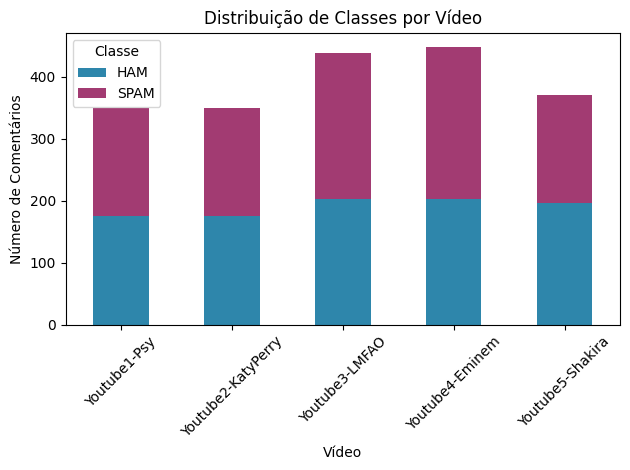


Percentual de SPAM/HAM por vídeo:
CLASS                   0      1
VIDEO                           
Youtube1-Psy        50.00  50.00
Youtube2-KatyPerry  50.00  50.00
Youtube3-LMFAO      46.12  53.88
Youtube4-Eminem     45.31  54.69
Youtube5-Shakira    52.97  47.03


In [18]:
# Lista dos arquivos CSV do dataset YouTube Spam Collection que vão ser usados no treinamento e teste
files = [
    'Youtube01-Psy.csv',
    'Youtube02-KatyPerry.csv',
    'Youtube03-LMFAO.csv',
    'Youtube04-Eminem.csv',
    'Youtube05-Shakira.csv'
]

# Carregamento e concatenação dos dados nos arquivos
dataframes = []
for file in files:
    try:
        df_temp = pd.read_csv(file)
        # ADICIONAR COLUNA DO VÍDEO PARA IDENTIFICAÇÃO
        df_temp['VIDEO'] = file.replace('.csv', '').replace('Youtube0', 'Youtube')
        print(f"Arquivo {file} carregado: {df_temp.shape[0]} linhas - Vídeo: {df_temp['VIDEO'].iloc[0]}")
        dataframes.append(df_temp)
    except FileNotFoundError:
        print(f"Arquivo {file} não encontrado!")

# Concatenação de todos os datasets
if dataframes:
    df = pd.concat(dataframes, ignore_index=True)
    print(f"\nDataset completo criado com {df.shape[0]} linhas e {df.shape[1]} colunas")
    print("Distribuição por vídeo:")
    print(df['VIDEO'].value_counts())
    print("\nPrimeiras 5 linhas:")
    print(df.head())
else:
    print("Nenhum arquivo foi carregado!")


    # Análise por vídeo
print("\n=== DISTRIBUIÇÃO POR VÍDEO ===")
video_class_dist = pd.crosstab(df['VIDEO'], df['CLASS'])
print(video_class_dist)

# Visualização por vídeo
plt.figure(figsize=(12, 6))
video_class_dist.plot(kind='bar', stacked=True, color=['#2E86AB', '#A23B72'])
plt.title('Distribuição de Classes por Vídeo')
plt.ylabel('Número de Comentários')
plt.xlabel('Vídeo')
plt.legend(title='Classe', labels=['HAM', 'SPAM'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Percentual por vídeo
video_class_pct = pd.crosstab(df['VIDEO'], df['CLASS'], normalize='index') * 100
print("\nPercentual de SPAM/HAM por vídeo:")
print(video_class_pct.round(2))

# 2. Análise Exploratória de Dados (EDA)

In [19]:
# Informações básicas sobre o dataset
print("=== INFORMAÇÕES BÁSICAS DO DATASET ===")
print(f"Formato dos dados: {df.shape}")
print(f"Colunas: {list(df.columns)}")
print("\n=== TIPOS DE DADOS ===")
print(df.dtypes)
print("\n=== INFORMAÇÕES GERAIS ===")
print(df.info())

print("\n=== VALORES ÚNICOS POR COLUNA ===")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} valores únicos")

print("\n=== PRIMEIROS REGISTROS ===")
df.head(10)

=== INFORMAÇÕES BÁSICAS DO DATASET ===
Formato dos dados: (1956, 6)
Colunas: ['COMMENT_ID', 'AUTHOR', 'DATE', 'CONTENT', 'CLASS', 'VIDEO']

=== TIPOS DE DADOS ===
COMMENT_ID    object
AUTHOR        object
DATE          object
CONTENT       object
CLASS          int64
VIDEO         object
dtype: object

=== INFORMAÇÕES GERAIS ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1956 entries, 0 to 1955
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COMMENT_ID  1956 non-null   object
 1   AUTHOR      1956 non-null   object
 2   DATE        1711 non-null   object
 3   CONTENT     1956 non-null   object
 4   CLASS       1956 non-null   int64 
 5   VIDEO       1956 non-null   object
dtypes: int64(1), object(5)
memory usage: 91.8+ KB
None

=== VALORES ÚNICOS POR COLUNA ===
COMMENT_ID: 1953 valores únicos
AUTHOR: 1792 valores únicos
DATE: 1709 valores únicos
CONTENT: 1760 valores únicos
CLASS: 2 valores únicos
VIDEO: 5 valo

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,VIDEO
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1,Youtube1-Psy
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1,Youtube1-Psy
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1,Youtube1-Psy
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,Youtube1-Psy
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1,Youtube1-Psy
5,LZQPQhLyRh9-wNRtlZDM90f1k0BrdVdJyN_YsaSwfxc,Jason Haddad,2013-11-26T02:55:11,"Hey, check out my new website!! This site is a...",1,Youtube1-Psy
6,z13lfzdo5vmdi1cm123te5uz2mqig1brz04,ferleck ferles,2013-11-27T21:39:24,Subscribe to my channel ﻿,1,Youtube1-Psy
7,z122wfnzgt30fhubn04cdn3xfx2mxzngsl40k,Bob Kanowski,2013-11-28T12:33:27,i turned it on mute as soon is i came on i jus...,0,Youtube1-Psy
8,z13ttt1jcraqexk2o234ghbgzxymz1zzi04,Cony,2013-11-28T16:01:47,You should check my channel for Funny VIDEOS!!﻿,1,Youtube1-Psy
9,z12avveb4xqiirsix04chxviiljryduwxg0,BeBe Burkey,2013-11-28T16:30:13,and u should.d check my channel and tell me wh...,1,Youtube1-Psy


=== ANÁLISE DE VALORES AUSENTES ===
       Coluna  Valores Ausentes  Percentual (%)
0  COMMENT_ID                 0        0.000000
1      AUTHOR                 0        0.000000
2        DATE               245       12.525562
3     CONTENT                 0        0.000000
4       CLASS                 0        0.000000
5       VIDEO                 0        0.000000

=== ANÁLISE DE DUPLICADOS ===
Número total de linhas duplicadas: 3
Exemplos de duplicados:
                                       COMMENT_ID          AUTHOR  \
1421  LneaDw26bFvPh9xBHNw1btQoyP60ay_WWthtvXCx37s     janez novak   
1443  LneaDw26bFuH6iFsSrjlJLJIX3qD4R8-emuZ-aGUj0o     Amir bassem   
1798  _2viQ_Qnc68fX3dYsfYuM-m4ELMJvxOQBmBOFHqGOk0  tyler sleetway   

                            DATE  \
1421                         NaN   
1443                         NaN   
1798  2013-10-05T00:57:25.078000   

                                                CONTENT  CLASS  \
1421  share and like this page to win a hand sig

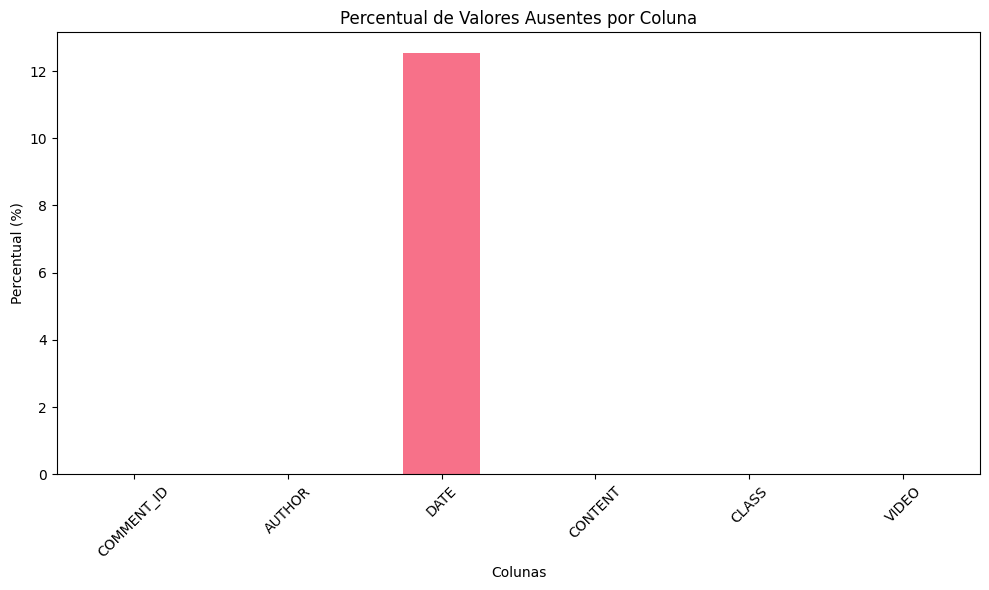

In [20]:
# Verificação de valores ausentes
print("=== ANÁLISE DE VALORES AUSENTES ===")
missing_data = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Coluna': missing_data.index,
    'Valores Ausentes': missing_data.values,
    'Percentual (%)': missing_percent.values
})

print(missing_df)

# Verificação de valores duplicados
print(f"\n=== ANÁLISE DE DUPLICADOS ===")
duplicates = df.duplicated().sum()
print(f"Número total de linhas duplicadas: {duplicates}")

if duplicates > 0:
    print("Exemplos de duplicados:")
    print(df[df.duplicated()].head())

# Verificação de duplicados por conteúdo (mais relevante para comentários)
content_duplicates = df.duplicated(subset=['CONTENT']).sum()
print(f"Comentários com conteúdo duplicado: {content_duplicates}")

# Visualização de valores ausentes
plt.figure(figsize=(10, 6))
missing_percent.plot(kind='bar')
plt.title('Percentual de Valores Ausentes por Coluna')
plt.ylabel('Percentual (%)')
plt.xlabel('Colunas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

=== ANÁLISE DA VARIÁVEL TARGET (CLASS) ===
Distribuição das classes:
1: 1005 (51.4%)
0: 951 (48.6%)


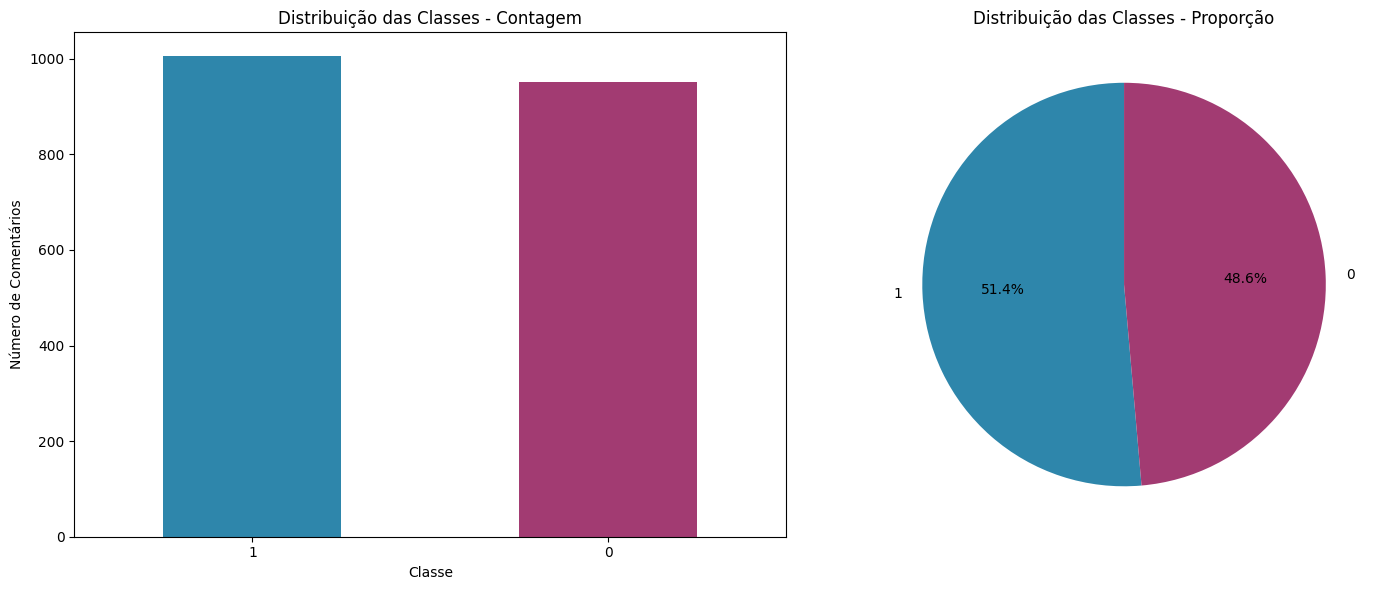

In [21]:
# Análise da distribuição das classes
print("=== ANÁLISE DA VARIÁVEL TARGET (CLASS) ===")
class_counts = df['CLASS'].value_counts()
class_percent = df['CLASS'].value_counts(normalize=True) * 100

print("Distribuição das classes:")
for class_name, count in class_counts.items():
    percent = class_percent[class_name]
    print(f"{class_name}: {count} ({percent:.1f}%)")

# Visualização da distribuição das classes
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras
class_counts.plot(kind='bar', ax=axes[0], color=['#2E86AB', '#A23B72'])
axes[0].set_title('Distribuição das Classes - Contagem')
axes[0].set_ylabel('Número de Comentários')
axes[0].set_xlabel('Classe')
axes[0].tick_params(axis='x', rotation=0)

# Gráfico de pizza
axes[1].pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%',
           colors=['#2E86AB', '#A23B72'], startangle=90)
axes[1].set_title('Distribuição das Classes - Proporção')

plt.tight_layout()
plt.show()

# # Análise por vídeo
# print("\n=== DISTRIBUIÇÃO POR VÍDEO ===")
# video_class_dist = pd.crosstab(df['VIDEO'], df['CLASS'])
# print(video_class_dist)

# # Visualização por vídeo
# plt.figure(figsize=(12, 6))
# video_class_dist.plot(kind='bar', stacked=True, color=['#2E86AB', '#A23B72'])
# plt.title('Distribuição de Classes por Vídeo')
# plt.ylabel('Número de Comentários')
# plt.xlabel('Vídeo')
# plt.legend(title='Classe')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

=== ESTATÍSTICAS DO CONTEÚDO DOS COMENTÁRIOS ===

Comprimento dos comentários (caracteres):
count    1956.000000
mean       94.700920
std       128.222062
min         2.000000
25%        29.000000
50%        48.000000
75%        97.000000
max      1200.000000
Name: content_length, dtype: float64

Número de palavras:
count    1956.000000
mean       15.581800
std        21.532844
min         1.000000
25%         5.000000
50%         8.000000
75%        16.000000
max       213.000000
Name: word_count, dtype: float64

=== COMPARAÇÃO ENTRE SPAM E HAM ===
SPAM:
        content_length  word_count
mean        137.336318   21.714428
median       65.000000   10.000000
std         158.977404   26.878342

HAM:
        content_length  word_count
mean         49.644585    9.100946
median       34.000000    6.000000
std          56.284782   10.432051


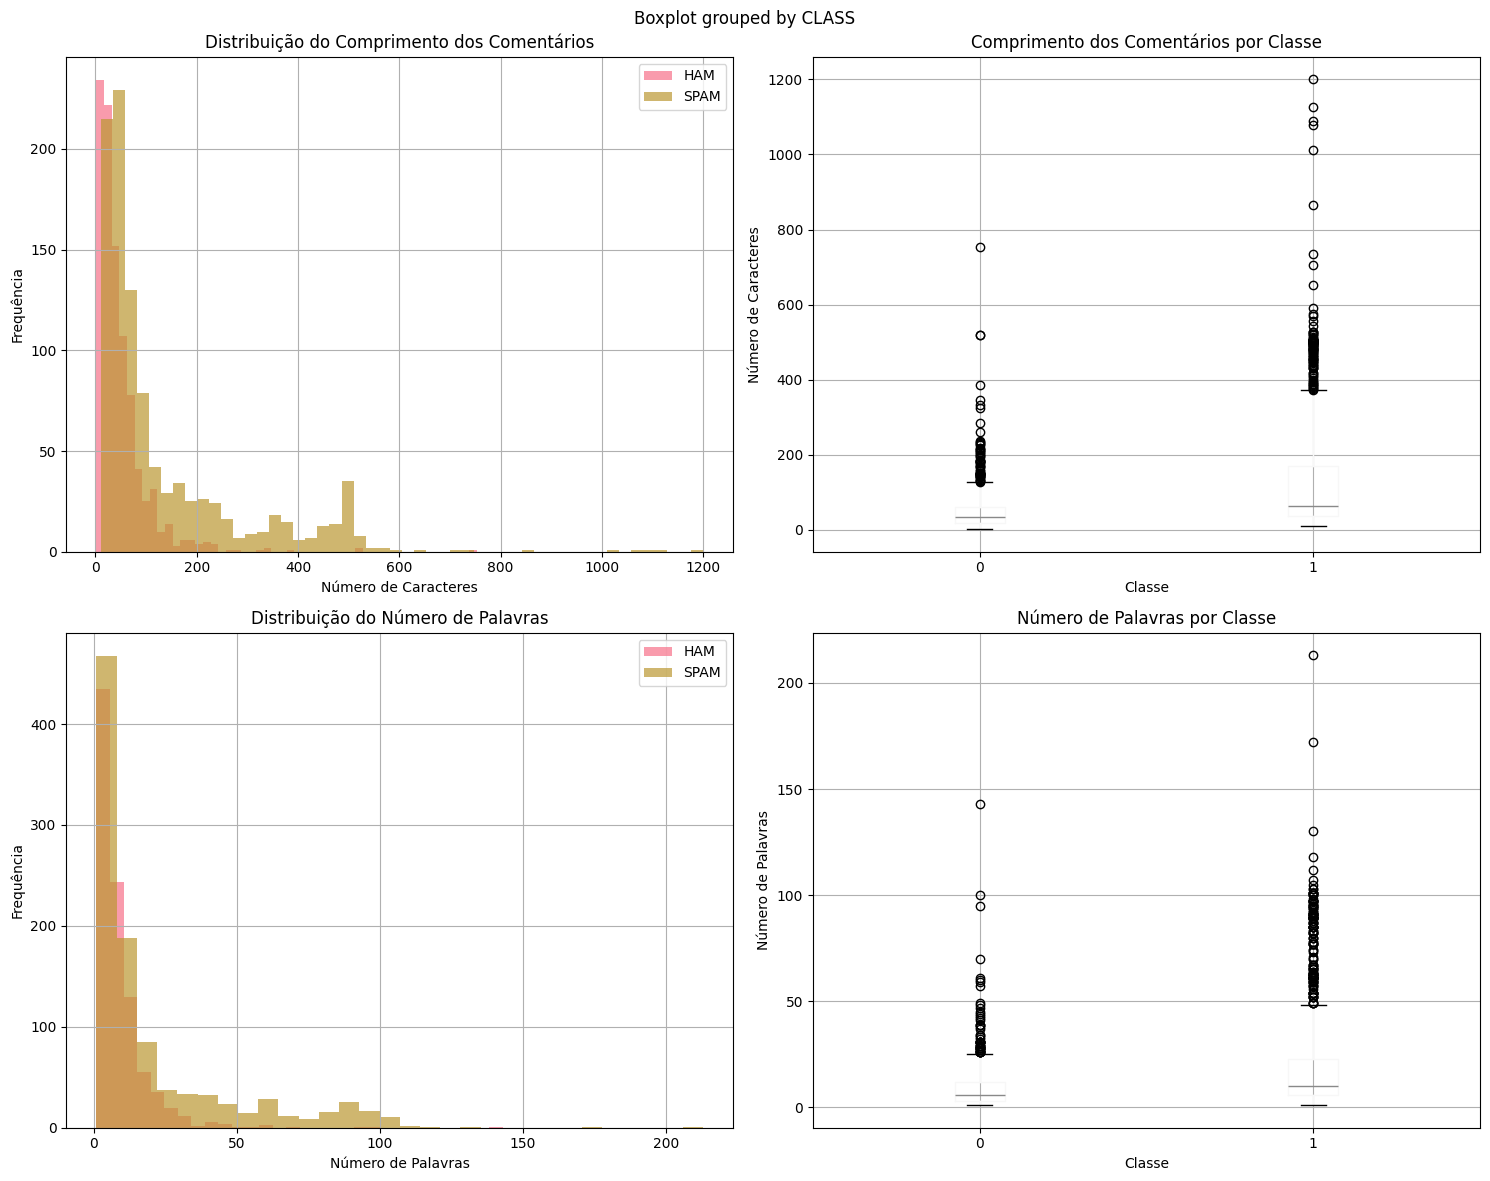


=== EXEMPLOS DE COMENTÁRIOS ===
SPAM (CLASS = 1):
1. Huh, anyway check out this you[tube] channel: kobyoshi02
2. Hey guys check out my new channel and our first vid THIS IS US THE  MONKEYS!!! I'm the monkey in the white shirt,please leave a like comment  and please subscribe!!!!
3. just for test I have to say murdev.com

HAM (CLASS = 0):
1. i turned it on mute as soon is i came on i just wanted to check the  views...﻿
2. I'm only checking the views﻿
3. i think about 100 millions of the views come from people who only wanted to  check the views﻿


In [22]:
# Análise do comprimento dos comentários
df['content_length'] = df['CONTENT'].str.len()
df['word_count'] = df['CONTENT'].str.split().str.len()

print("=== ESTATÍSTICAS DO CONTEÚDO DOS COMENTÁRIOS ===")
print("\nComprimento dos comentários (caracteres):")
print(df['content_length'].describe())

print("\nNúmero de palavras:")
print(df['word_count'].describe())

# Análise por classe
print("\n=== COMPARAÇÃO ENTRE SPAM E HAM ===")
spam_stats = df[df['CLASS'] == 1].agg({
    'content_length': ['mean', 'median', 'std'],
    'word_count': ['mean', 'median', 'std']
})

ham_stats = df[df['CLASS'] == 0].agg({
    'content_length': ['mean', 'median', 'std'],
    'word_count': ['mean', 'median', 'std']
})

print("SPAM:")
print(spam_stats)
print("\nHAM:")
print(ham_stats)

# Visualizações
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Histograma do comprimento dos comentários
df[df['CLASS'] == 0]['content_length'].hist(bins=50, alpha=0.7, label='HAM', ax=axes[0,0])
df[df['CLASS'] == 1]['content_length'].hist(bins=50, alpha=0.7, label='SPAM', ax=axes[0,0])
axes[0,0].set_title('Distribuição do Comprimento dos Comentários')
axes[0,0].set_xlabel('Número de Caracteres')
axes[0,0].set_ylabel('Frequência')
axes[0,0].legend()

# Boxplot do comprimento dos comentários
df.boxplot(column='content_length', by='CLASS', ax=axes[0,1])
axes[0,1].set_title('Comprimento dos Comentários por Classe')
axes[0,1].set_xlabel('Classe')
axes[0,1].set_ylabel('Número de Caracteres')

# Histograma do número de palavras
df[df['CLASS'] == 0]['word_count'].hist(bins=30, alpha=0.7, label='HAM', ax=axes[1,0])
df[df['CLASS'] == 1]['word_count'].hist(bins=30, alpha=0.7, label='SPAM', ax=axes[1,0])
axes[1,0].set_title('Distribuição do Número de Palavras')
axes[1,0].set_xlabel('Número de Palavras')
axes[1,0].set_ylabel('Frequência')
axes[1,0].legend()

# Boxplot do número de palavras
df.boxplot(column='word_count', by='CLASS', ax=axes[1,1])
axes[1,1].set_title('Número de Palavras por Classe')
axes[1,1].set_xlabel('Classe')
axes[1,1].set_ylabel('Número de Palavras')

plt.tight_layout()
plt.show()

# Exemplos de comentários
print("\n=== EXEMPLOS DE COMENTÁRIOS ===")
print("SPAM (CLASS = 1):")
spam_examples = df[df['CLASS'] == 1]['CONTENT'].head(3)
for i, comment in enumerate(spam_examples, 1):
    print(f"{i}. {comment}")

print("\nHAM (CLASS = 0):")
ham_examples = df[df['CLASS'] == 0]['CONTENT'].head(3)
for i, comment in enumerate(ham_examples, 1):
    print(f"{i}. {comment}")

# Pré-processamento dos Dados

In [23]:
# Importação de bibliotecas para processamento de texto
import string
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def clean_text(text):
    """
    Função para limpeza básica do texto
    - Remove pontuações
    - Converte para minúsculas
    - Remove espaços extras
    """
    if pd.isna(text):
        return ""

    # Converter para string e minúsculas
    text = str(text).lower()

    # Remover pontuações
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remover números
    text = re.sub(r'\d+', '', text)

    # Remover espaços extras
    text = ' '.join(text.split())

    return text

# Aplicar limpeza no texto
print("=== PRÉ-PROCESSAMENTO DE TEXTO ===")
print("Aplicando limpeza básica ao conteúdo dos comentários...")

df['content_clean'] = df['CONTENT'].apply(clean_text)

# Verificar se há valores ausentes após limpeza
print(f"Valores ausentes após limpeza: {df['content_clean'].isnull().sum()}")

# Remover comentários vazios após limpeza
empty_comments = df['content_clean'].str.strip() == ''
print(f"Comentários vazios após limpeza: {empty_comments.sum()}")

if empty_comments.sum() > 0:
    print("Removendo comentários vazios...")
    df = df[~empty_comments].reset_index(drop=True)
    print(f"Dataset após remoção: {df.shape[0]} linhas")

# Exemplos de limpeza
print("\n=== EXEMPLOS DE LIMPEZA ===")
for i in range(3):
    print(f"Original: {df['CONTENT'].iloc[i]}")
    print(f"Limpo: {df['content_clean'].iloc[i]}")
    print("-" * 50)

=== PRÉ-PROCESSAMENTO DE TEXTO ===
Aplicando limpeza básica ao conteúdo dos comentários...
Valores ausentes após limpeza: 0
Comentários vazios após limpeza: 2
Removendo comentários vazios...
Dataset após remoção: 1954 linhas

=== EXEMPLOS DE LIMPEZA ===
Original: Huh, anyway check out this you[tube] channel: kobyoshi02
Limpo: huh anyway check out this youtube channel kobyoshi
--------------------------------------------------
Original: Hey guys check out my new channel and our first vid THIS IS US THE  MONKEYS!!! I'm the monkey in the white shirt,please leave a like comment  and please subscribe!!!!
Limpo: hey guys check out my new channel and our first vid this is us the monkeys im the monkey in the white shirtplease leave a like comment and please subscribe
--------------------------------------------------
Original: just for test I have to say murdev.com
Limpo: just for test i have to say murdevcom
--------------------------------------------------


=== ANÁLISE DE FEATURES DISCRIMINATIVAS POR CLASSE ===

Calculando scores Chi-quadrado para seleção de features...
Cálculo de scores Chi-quadrado concluído.

=== TOP 10 FEATURES QUE INDICAM SPAM ===
(Features com maior presença em comentários SPAM)
                feature  chi2_score  spam_mean  ham_mean  spam_ham_ratio
281               check     79.3823     0.0904    0.0024    3.834440e+01
313         check video     58.2622     0.0619    0.0002    3.312117e+02
4502          subscribe     55.4781     0.0591    0.0002    2.797013e+02
4747      video youtube     48.4273     0.0551    0.0014    3.841160e+01
4960            youtube     47.1141     0.0617    0.0045    1.373040e+01
254             channel     37.4265     0.0404    0.0003    1.251035e+02
4722              video     25.4323     0.0607    0.0157    3.862800e+00
4071           playlist     17.9575     0.0189    0.0000    1.892260e+06
303      check playlist     17.7837     0.0187    0.0000    1.873943e+06
4505  subscribe chann

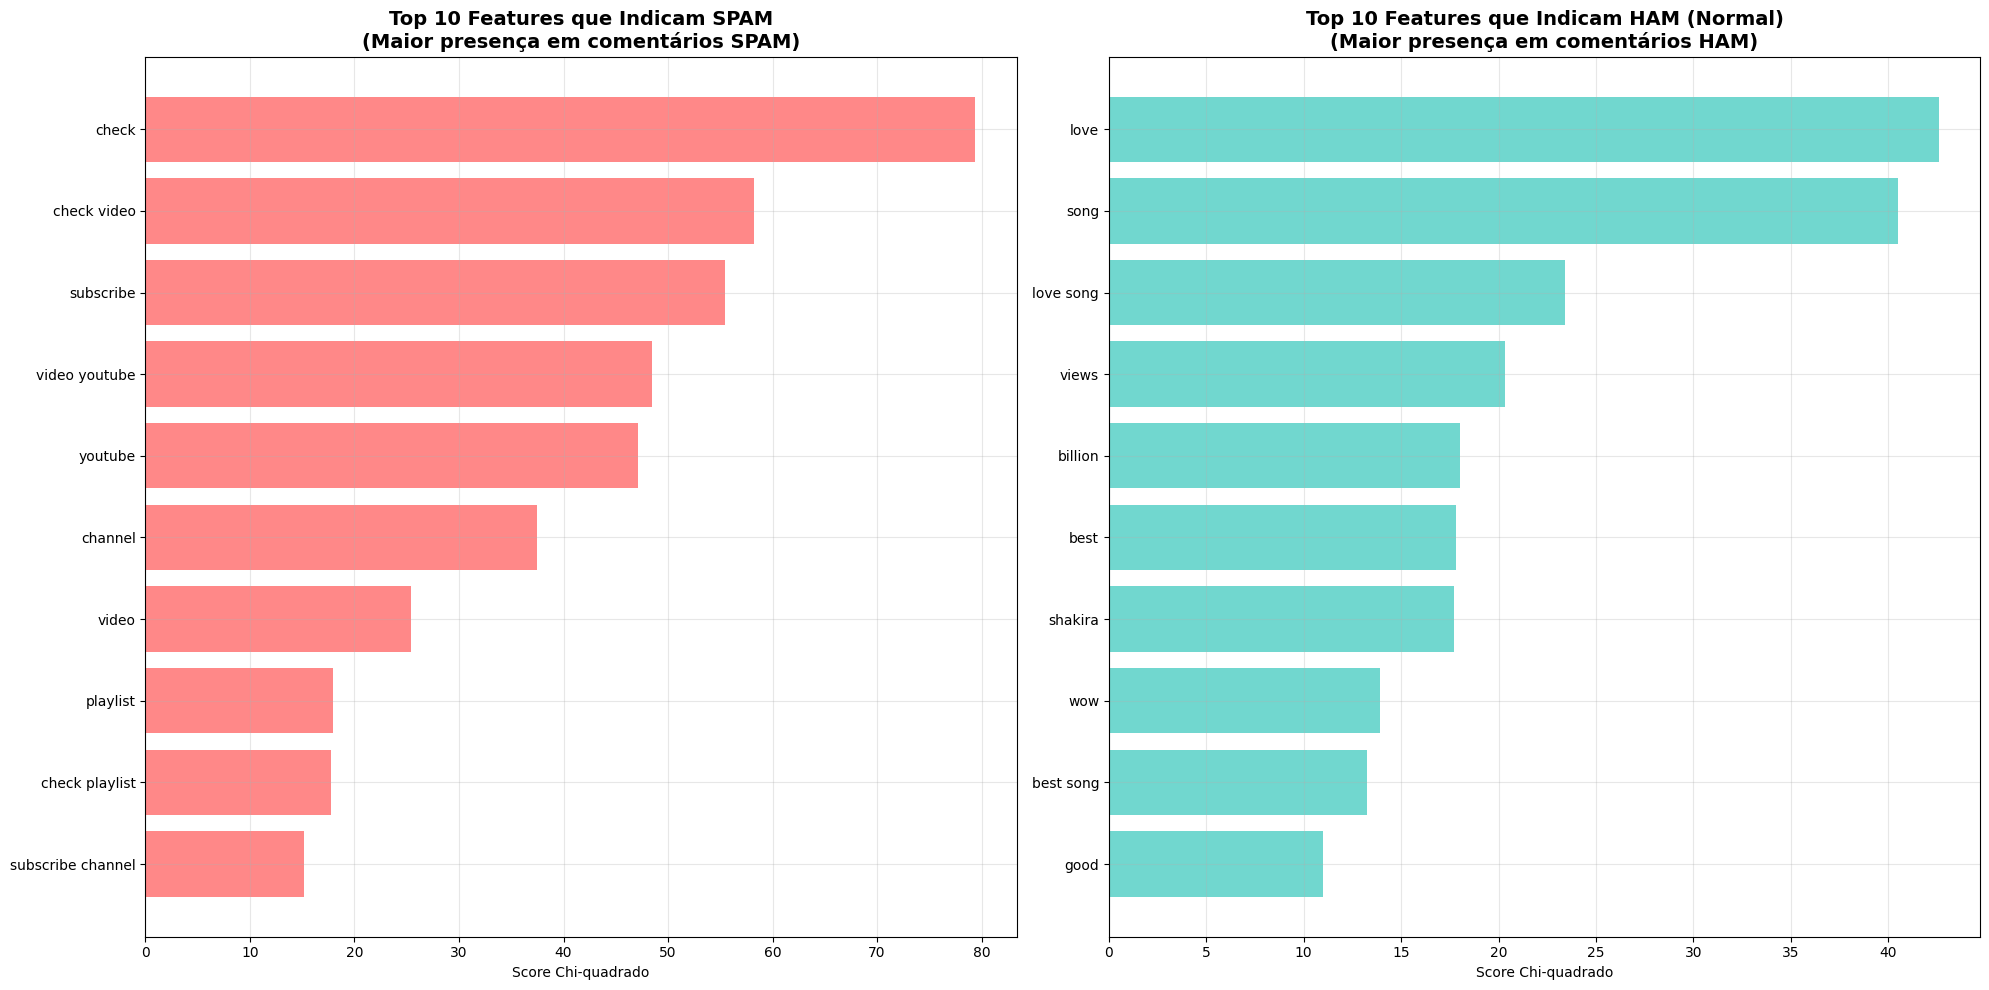


=== ANÁLISE COMPARATIVA DETALHADA ===


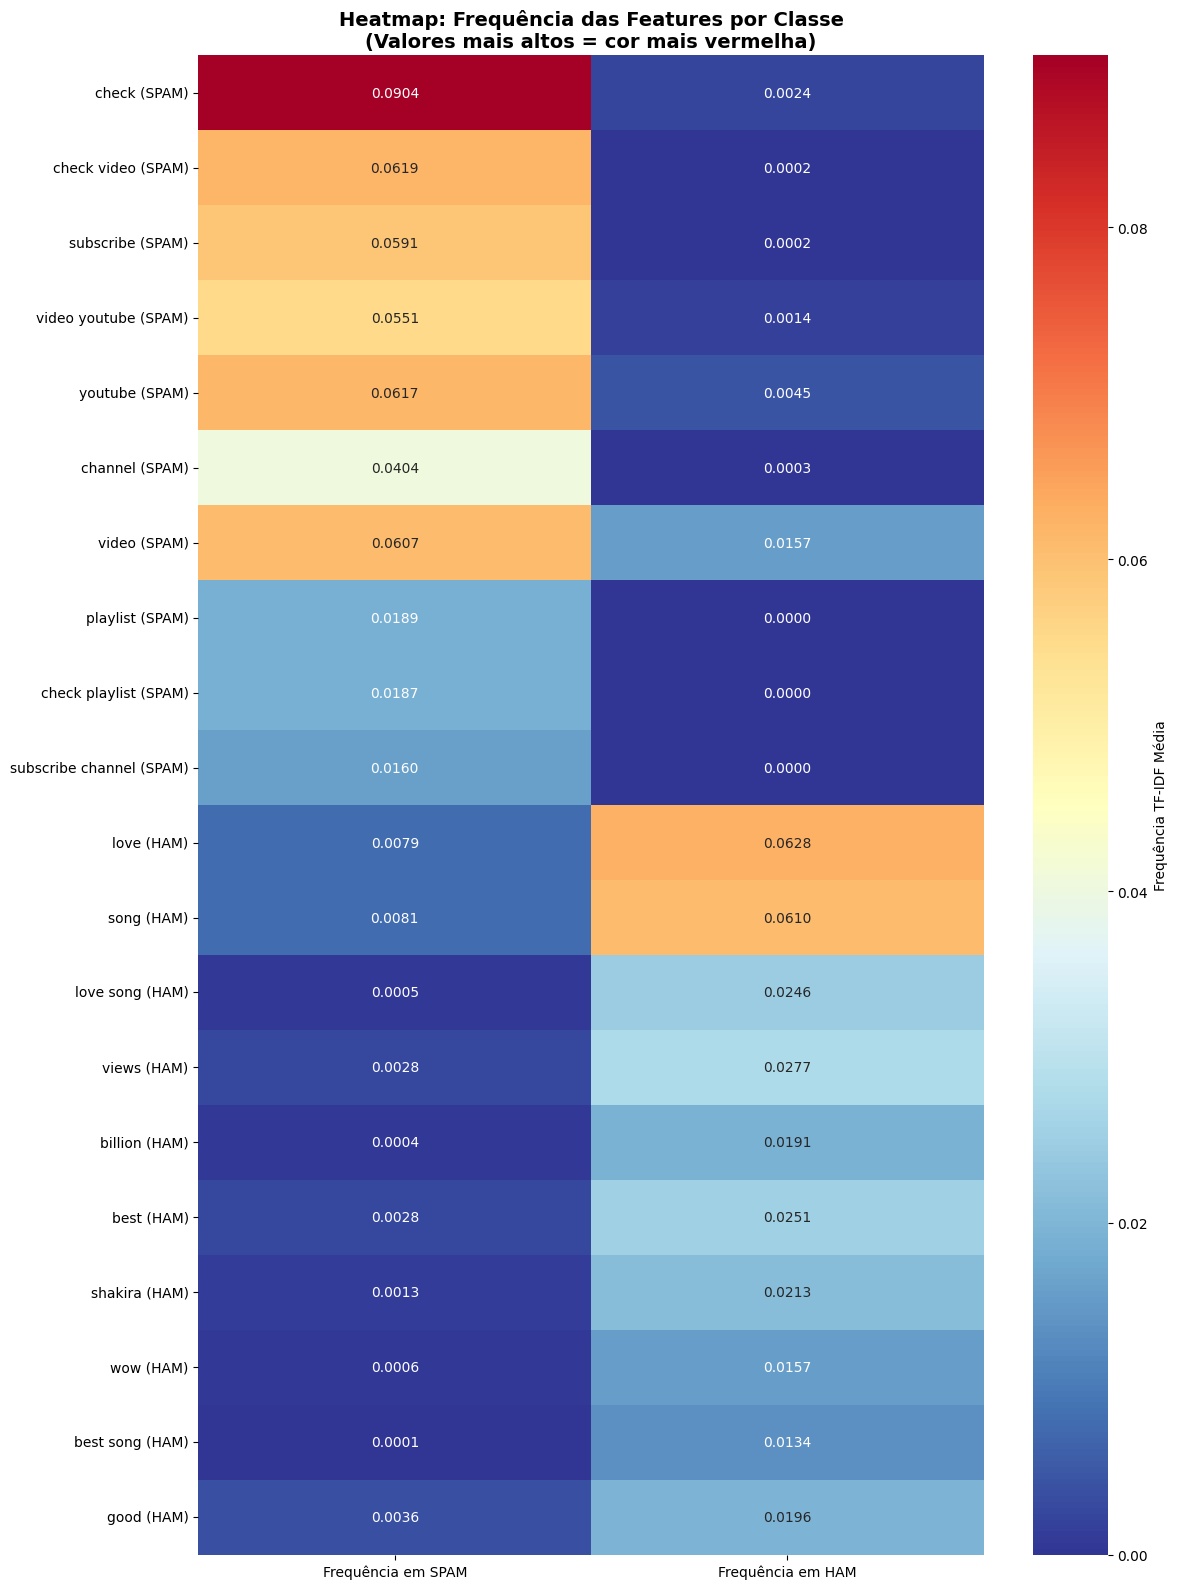


=== INTERPRETAÇÃO DOS RESULTADOS ===
📊 FEATURES QUE INDICAM SPAM:
   - Palavras relacionadas a ações (check, subscribe)
   - Referências a conteúdo (video, playlist, channel)
   - Termos genéricos de engajamento

📊 FEATURES QUE INDICAM HAM (COMENTÁRIOS NORMAIS):
   - Expressões mais específicas e contextuais
   - Linguagem mais natural e variada
   - Menos termos genéricos de call-to-action

📈 ESTATÍSTICAS GERAIS:
   - Total de features analisadas: 5000
   - Features que favorecem SPAM: 3528
   - Features que favorecem HAM: 1472

✅ Análise de features discriminativas concluída!
   - Dois gráficos gerados: indicadores de SPAM vs indicadores de HAM
   - Heatmap comparativo criado
   - Interpretação dos padrões identificados


In [24]:
# Análise das features mais importantes POR CLASSE
print("=== ANÁLISE DE FEATURES DISCRIMINATIVAS POR CLASSE ===")

# Importar função necessária para verificação de matriz esparsa
from sklearn.feature_selection import chi2
import numpy as np
from scipy.sparse import csr_matrix # Importar csr_matrix para indexação adequada

# Garantir que X_tfidf e y estão definidos (assumindo que vêm das células anteriores)
# Se não estiverem, você pode precisar executar novamente a célula de vetorização de texto

# Calcular scores Chi-quadrado para seleção de features
print("\nCalculando scores Chi-quadrado para seleção de features...")
chi2_scores, p_values = chi2(X_tfidf, y)
print("Cálculo de scores Chi-quadrado concluído.")

# Calcular a média de cada feature para cada classe
# Usar indexação booleana diretamente na matriz esparsa e então calcular a média
spam_mean = np.array(X_tfidf[y.values == 1].mean(axis=0)).flatten()
ham_mean = np.array(X_tfidf[y.values == 0].mean(axis=0)).flatten()

# Criar DataFrame com estatísticas por classe
feature_analysis = pd.DataFrame({
    'feature': feature_names,
    'chi2_score': chi2_scores,
    'p_value': p_values,
    'spam_mean': spam_mean,
    'ham_mean': ham_mean,
    'spam_ham_ratio': spam_mean / (ham_mean + 1e-8),  # Evitar divisão por zero
    'difference': spam_mean - ham_mean
}).sort_values('chi2_score', ascending=False)

# Identificar features que favorecem SPAM vs HAM
spam_features = feature_analysis[feature_analysis['difference'] > 0].head(10)
ham_features = feature_analysis[feature_analysis['difference'] < 0].head(10)

print("\n=== TOP 10 FEATURES QUE INDICAM SPAM ===")
print("(Features com maior presença em comentários SPAM)")
print(spam_features[['feature', 'chi2_score', 'spam_mean', 'ham_mean', 'spam_ham_ratio']].round(4))

print("\n=== TOP 10 FEATURES QUE INDICAM HAM (NORMAL) ===")
print("(Features com maior presença em comentários HAM)")
print(ham_features[['feature', 'chi2_score', 'spam_mean', 'ham_mean', 'spam_ham_ratio']].round(4))

# Visualizações separadas
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Gráfico 1: Features que indicam SPAM
axes[0].barh(range(len(spam_features)), spam_features['chi2_score'], color='#FF6B6B', alpha=0.8)
axes[0].set_yticks(range(len(spam_features)))
axes[0].set_yticklabels(spam_features['feature'])
axes[0].set_xlabel('Score Chi-quadrado')
axes[0].set_title('Top 10 Features que Indicam SPAM\n(Maior presença em comentários SPAM)', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].invert_yaxis()

# Gráfico 2: Features que indicam HAM
axes[1].barh(range(len(ham_features)), ham_features['chi2_score'], color='#4ECDC4', alpha=0.8)
axes[1].set_yticks(range(len(ham_features)))
axes[1].set_yticklabels(ham_features['feature'])
axes[1].set_xlabel('Score Chi-quadrado')
axes[1].set_title('Top 10 Features que Indicam HAM (Normal)\n(Maior presença em comentários HAM)', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

# Análise mais detalhada com heatmap
print("\n=== ANÁLISE COMPARATIVA DETALHADA ===")

# Selecionar top 10 de cada categoria para heatmap
top_spam = spam_features.head(10)
top_ham = ham_features.head(10)

# Criar matriz para heatmap
heatmap_data = []
labels = []

for _, row in top_spam.iterrows():
    heatmap_data.append([row['spam_mean'], row['ham_mean']])
    labels.append(f"{row['feature']} (SPAM)")

for _, row in top_ham.iterrows():
    heatmap_data.append([row['spam_mean'], row['ham_mean']])
    labels.append(f"{row['feature']} (HAM)")

heatmap_matrix = np.array(heatmap_data)

# Criar heatmap
plt.figure(figsize=(12, 16))
sns.heatmap(heatmap_matrix,
            annot=True,
            fmt='.4f',
            cmap='RdYlBu_r',
            xticklabels=['Frequência em SPAM', 'Frequência em HAM'],
            yticklabels=labels,
            cbar_kws={'label': 'Frequência TF-IDF Média'})
plt.title('Heatmap: Frequência das Features por Classe\n(Valores mais altos = cor mais vermelha)',
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Resumo interpretativo
print("\n=== INTERPRETAÇÃO DOS RESULTADOS ===")
print("📊 FEATURES QUE INDICAM SPAM:")
print("   - Palavras relacionadas a ações (check, subscribe)")
print("   - Referências a conteúdo (video, playlist, channel)")
print("   - Termos genéricos de engajamento")

print("\n📊 FEATURES QUE INDICAM HAM (COMENTÁRIOS NORMAIS):")
print("   - Expressões mais específicas e contextuais")
print("   - Linguagem mais natural e variada")
print("   - Menos termos genéricos de call-to-action")

print(f"\n📈 ESTATÍSTICAS GERAIS:")
print(f"   - Total de features analisadas: {len(feature_names)}")
print(f"   - Features que favorecem SPAM: {len(feature_analysis[feature_analysis['difference'] > 0])}")
print(f"   - Features que favorecem HAM: {len(feature_analysis[feature_analysis['difference'] < 0])}")

# Salvar análise para uso posterior
feature_importance_analysis = {
    'spam_indicators': spam_features,
    'ham_indicators': ham_features,
    'full_analysis': feature_analysis
}

print("\n✅ Análise de features discriminativas concluída!")
print("   - Dois gráficos gerados: indicadores de SPAM vs indicadores de HAM")
print("   - Heatmap comparativo criado")
print("   - Interpretação dos padrões identificados")

=== DIVISÃO DOS DADOS POR VÍDEO ===
Vídeos para treino: ['Youtube1-Psy', 'Youtube2-KatyPerry', 'Youtube3-LMFAO', 'Youtube4-Eminem']
Vídeo para teste: Youtube5-Shakira

Número de comentários por grupo:
Treino: 1586 comentários
Teste: 368 comentários
Total categorizado: 1954 de 1954 (100.0%)

Tamanho do conjunto de treino: (1586, 5000)
Tamanho do conjunto de teste: (368, 5000)

=== DISTRIBUIÇÃO DAS CLASSES ===
Conjunto de treino (4 vídeos):
CLASS
1    831
0    755
Name: count, dtype: int64
Proporção - HAM: 0.476, SPAM: 0.524

Conjunto de teste (Shakira):
CLASS
0    194
1    174
Name: count, dtype: int64
Proporção - HAM: 0.527, SPAM: 0.473

=== ANÁLISE DETALHADA POR VÍDEO ===
Distribuição nos vídeos de treino:
CLASS                 0    1
VIDEO                       
Youtube1-Psy        175  175
Youtube2-KatyPerry  175  175
Youtube3-LMFAO      202  236
Youtube4-Eminem     203  245

Distribuição no vídeo de teste:
CLASS               0    1
VIDEO                     
Youtube5-Shakira  194 

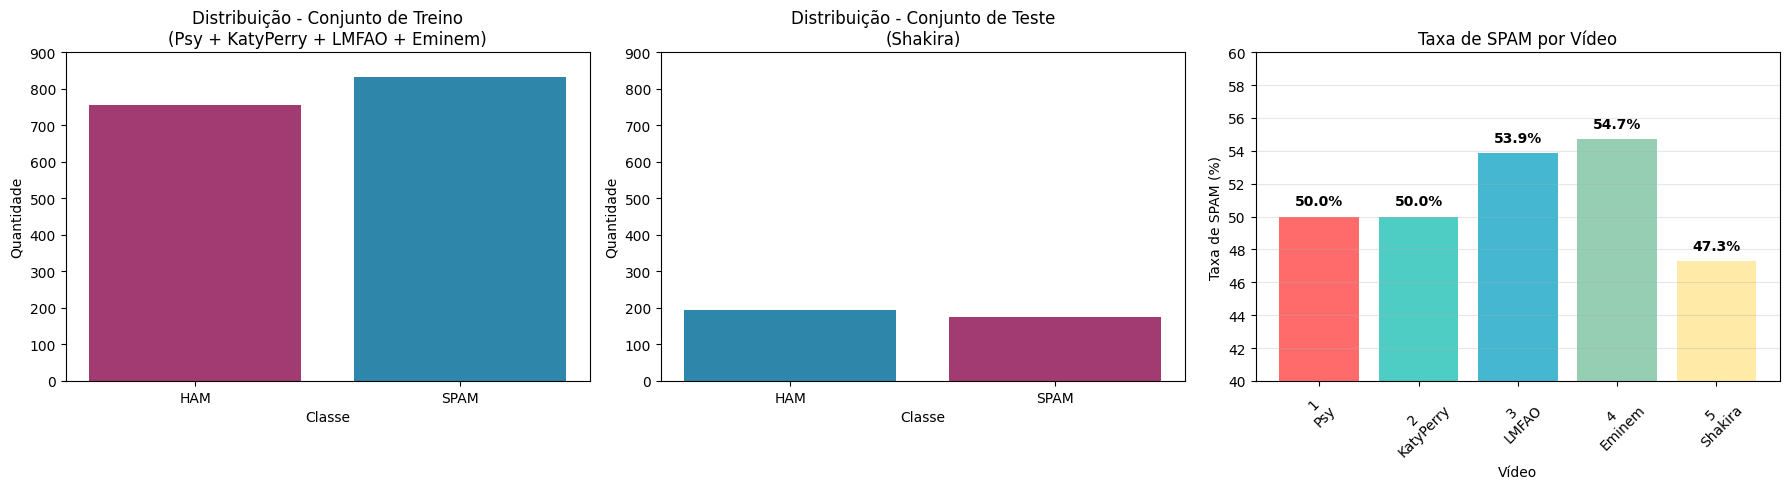


=== ANÁLISE DE BALANCEAMENTO ===
Proporção HAM no treino: 0.476
Proporção SPAM no treino: 0.524
Diferença: 0.048
Dataset está relativamente balanceado (diferença < 10%)
Não será necessário aplicar técnicas de balanceamento

=== JUSTIFICATIVAS DAS ESCOLHAS ===
1. Divisão por vídeo implementada para:
   - Evitar data leakage entre comentários do mesmo vídeo
   - Simular cenário real onde modelo é testado em novo vídeo
   - Avaliação mais robusta da capacidade de generalização

2. TF-IDF escolhido por:
   - Capturar importância relativa das palavras
   - Reduzir impacto de palavras muito comuns
   - Eficiente para classificação de texto

3. Parâmetros do TF-IDF:
   - max_features=5000: balancear performance e informação
   - ngram_range=(1,2): capturar contexto com bigramas
   - stop_words='english': remover palavras irrelevantes


In [25]:
# Divisão dos dados por vídeo para evitar data leakage
print("=== DIVISÃO DOS DADOS POR VÍDEO ===")

# Definir vídeos para treino e teste
train_videos = ['Youtube1-Psy', 'Youtube2-KatyPerry', 'Youtube3-LMFAO', 'Youtube4-Eminem']
test_video = 'Youtube5-Shakira'

print(f"Vídeos para treino: {train_videos}")
print(f"Vídeo para teste: {test_video}")

# Criar máscaras para divisão por vídeo
train_mask = df['VIDEO'].isin(train_videos)
test_mask = df['VIDEO'] == test_video

print(f"\nNúmero de comentários por grupo:")
print(f"Treino: {train_mask.sum()} comentários")
print(f"Teste: {test_mask.sum()} comentários")

# Verificar se todos os dados foram categorizados
total_categorized = train_mask.sum() + test_mask.sum()
print(f"Total categorizado: {total_categorized} de {len(df)} ({total_categorized/len(df)*100:.1f}%)")

# Aplicar a divisão aos dados
# Convert boolean masks to numpy arrays for indexing sparse matrix
X_train = X_tfidf[train_mask.values]
X_test = X_tfidf[test_mask.values]
y_train = y[train_mask].reset_index(drop=True)
y_test = y[test_mask].reset_index(drop=True)

print(f"\nTamanho do conjunto de treino: {X_train.shape}")
print(f"Tamanho do conjunto de teste: {X_test.shape}")

# Verificar distribuição das classes após divisão
print(f"\n=== DISTRIBUIÇÃO DAS CLASSES ===")
print("Conjunto de treino (4 vídeos):")
train_dist = pd.Series(y_train).value_counts()
print(train_dist)
print(f"Proporção - HAM: {train_dist.get(0, 0)/len(y_train):.3f}, SPAM: {train_dist.get(1, 0)/len(y_train):.3f}")

print("\nConjunto de teste (Shakira):")
test_dist = pd.Series(y_test).value_counts()
print(test_dist)
print(f"Proporção - HAM: {test_dist.get(0, 0)/len(y_test):.3f}, SPAM: {test_dist.get(1, 0)/len(y_test):.3f}")

# Análise detalhada por vídeo
print(f"\n=== ANÁLISE DETALHADA POR VÍDEO ===")
train_video_dist = df[train_mask].groupby(['VIDEO', 'CLASS']).size().unstack(fill_value=0)
print("Distribuição nos vídeos de treino:")
print(train_video_dist)

test_video_dist = df[test_mask].groupby(['VIDEO', 'CLASS']).size().unstack(fill_value=0)
print("\nDistribuição no vídeo de teste:")
print(test_video_dist)

# Visualização da distribuição
from collections import Counter
train_counter = Counter(y_train)
test_counter = Counter(y_test)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Definir limite máximo para padronizar a escala
max_y_limit = 900

# Treino
axes[0].bar(train_counter.keys(), train_counter.values(), color=['#2E86AB', '#A23B72'])
axes[0].set_title('Distribuição - Conjunto de Treino\n(Psy + KatyPerry + LMFAO + Eminem)')
axes[0].set_xlabel('Classe')
axes[0].set_ylabel('Quantidade')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['HAM', 'SPAM'])
axes[0].set_ylim(0, max_y_limit)  # Adicionar esta linha

# Teste
axes[1].bar(test_counter.keys(), test_counter.values(), color=['#2E86AB', '#A23B72'])
axes[1].set_title('Distribuição - Conjunto de Teste\n(Shakira)')
axes[1].set_xlabel('Classe')
axes[1].set_ylabel('Quantidade')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['HAM', 'SPAM'])
axes[1].set_ylim(0, max_y_limit)  # Adicionar esta linha

# Comparação por vídeo
video_spam_rate = df.groupby('VIDEO')['CLASS'].mean() * 100
axes[2].bar(range(len(video_spam_rate)), video_spam_rate.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7'])
axes[2].set_title('Taxa de SPAM por Vídeo')
axes[2].set_xlabel('Vídeo')
axes[2].set_ylabel('Taxa de SPAM (%)')
axes[2].set_xticks(range(len(video_spam_rate)))
axes[2].set_xticklabels([v.replace('Youtube', '').replace('-', '\n') for v in video_spam_rate.index], rotation=45)
axes[2].set_ylim(40, 60)
axes[2].set_yticks(range(40, 61, 2))
axes[2].grid(axis='y', alpha=0.3)

for i, v in enumerate(video_spam_rate.values):
    axes[2].text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Análise de balanceamento
ham_train_pct = train_counter[0] / (train_counter[0] + train_counter[1])
spam_train_pct = train_counter[1] / (train_counter[0] + train_counter[1])

print(f"\n=== ANÁLISE DE BALANCEAMENTO ===")
print(f"Proporção HAM no treino: {ham_train_pct:.3f}")
print(f"Proporção SPAM no treino: {spam_train_pct:.3f}")
print(f"Diferença: {abs(ham_train_pct - spam_train_pct):.3f}")

if abs(ham_train_pct - spam_train_pct) < 0.1:
    print("Dataset está relativamente balanceado (diferença < 10%)")
    print("Não será necessário aplicar técnicas de balanceamento")
else:
    print("Dataset desbalanceado (diferença >= 10%)")
    print("Vou utilizar tecnicas de balanceamento (SMOTE, oversampling, etc.)")

print(f"\n=== JUSTIFICATIVAS DAS ESCOLHAS ===")
print("1. Divisão por vídeo implementada para:")
print("   - Evitar data leakage entre comentários do mesmo vídeo")
print("   - Simular cenário real onde modelo é testado em novo vídeo")
print("   - Avaliação mais robusta da capacidade de generalização")

print("\n2. TF-IDF escolhido por:")
print("   - Capturar importância relativa das palavras")
print("   - Reduzir impacto de palavras muito comuns")
print("   - Eficiente para classificação de texto")

print("\n3. Parâmetros do TF-IDF:")
print("   - max_features=5000: balancear performance e informação")
print("   - ngram_range=(1,2): capturar contexto com bigramas")
print("   - stop_words='english': remover palavras irrelevantes")

# Treinamento dos Modelos de Machine Learning

In [26]:
# Importação de bibliotecas para Machine Learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import (classification_report, confusion_matrix,
                           accuracy_score, precision_score, recall_score,
                           f1_score, roc_auc_score, roc_curve)
import xgboost as xgb
from scipy.sparse import csr_matrix
import time

# Configuração da validação cruzada
cv_folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("=== BIBLIOTECAS DE MACHINE LEARNING IMPORTADAS ===")
print("Algoritmos que serão utilizados:")
print("1. XGBoost - Gradient Boosting otimizado")
print("2. Random Forest - Ensemble de árvores de decisão")
print("3. Support Vector Machine (SVM) - Classificação por margem máxima")
print(f"\nValidação cruzada configurada: {cv_folds.n_splits} folds")

# Verificar formato dos dados
print(f"\nFormato dos dados de treino: {X_train.shape}")
print(f"Formato dos dados de teste: {X_test.shape}")
print(f"Tipo da matriz: {type(X_train)}")

# Converter para formato denso se necessário para alguns algoritmos
print(f"Densidade da matriz de treino: {X_train.nnz / (X_train.shape[0] * X_train.shape[1]):.4f}")
print(f"Densidade da matriz de teste: {X_test.nnz / (X_test.shape[0] * X_test.shape[1]):.4f}")

=== BIBLIOTECAS DE MACHINE LEARNING IMPORTADAS ===
Algoritmos que serão utilizados:
1. XGBoost - Gradient Boosting otimizado
2. Random Forest - Ensemble de árvores de decisão
3. Support Vector Machine (SVM) - Classificação por margem máxima

Validação cruzada configurada: 5 folds

Formato dos dados de treino: (1586, 5000)
Formato dos dados de teste: (368, 5000)
Tipo da matriz: <class 'scipy.sparse._csr.csr_matrix'>
Densidade da matriz de treino: 0.0018
Densidade da matriz de teste: 0.0025


# Treinamento XGBOOST

In [27]:
# TREINAMENTO DO XGBOOST
print("=== TREINAMENTO DO XGBOOST ===")

# Parâmetros para otimização
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

print("Grade de parâmetros para XGBoost:")
for param, values in xgb_param_grid.items():
    print(f"  {param}: {values}")

# Modelo base
xgb_base = xgb.XGBClassifier(
    random_state=42,
    eval_metric='logloss',
    use_label_encoder=False
)

# Grid Search com validação cruzada
print("\nIniciando Grid Search para XGBoost...")
start_time = time.time()

xgb_grid = GridSearchCV(
    estimator=xgb_base,
    param_grid=xgb_param_grid,
    cv=cv_folds,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

xgb_grid.fit(X_train, y_train)

end_time = time.time()
print(f"Tempo de treinamento: {end_time - start_time:.2f} segundos")

# Melhor modelo
xgb_best = xgb_grid.best_estimator_
print(f"\nMelhores parâmetros XGBoost:")
for param, value in xgb_grid.best_params_.items():
    print(f"  {param}: {value}")

print(f"Melhor score F1 (CV): {xgb_grid.best_score_:.4f}")

# Validação cruzada com o melhor modelo
xgb_cv_scores = cross_val_score(xgb_best, X_train, y_train, cv=cv_folds, scoring='f1')
print(f"\nScores de validação cruzada F1:")
print(f"  Média: {xgb_cv_scores.mean():.4f}")
print(f"  Desvio padrão: {xgb_cv_scores.std():.4f}")
print(f"  Scores individuais: {xgb_cv_scores}")

# Predições no conjunto de teste
xgb_y_pred = xgb_best.predict(X_test)
xgb_y_pred_proba = xgb_best.predict_proba(X_test)[:, 1]

# Métricas de avaliação
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
xgb_precision = precision_score(y_test, xgb_y_pred)
xgb_recall = recall_score(y_test, xgb_y_pred)
xgb_f1 = f1_score(y_test, xgb_y_pred)
xgb_auc = roc_auc_score(y_test, xgb_y_pred_proba)

print(f"\n=== RESULTADOS XGBOOST NO CONJUNTO DE TESTE ===")
print(f"Accuracy: {xgb_accuracy:.4f}")
print(f"Precision: {xgb_precision:.4f}")
print(f"Recall: {xgb_recall:.4f}")
print(f"F1-Score: {xgb_f1:.4f}")
print(f"AUC-ROC: {xgb_auc:.4f}")

# Relatório de classificação
print(f"\nRelatório de Classificação XGBoost:")
print(classification_report(y_test, xgb_y_pred, target_names=['HAM', 'SPAM']))

=== TREINAMENTO DO XGBOOST ===
Grade de parâmetros para XGBoost:
  n_estimators: [100, 200]
  max_depth: [3, 5, 7]
  learning_rate: [0.1, 0.2]
  subsample: [0.8, 1.0]
  colsample_bytree: [0.8, 1.0]

Iniciando Grid Search para XGBoost...
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Tempo de treinamento: 142.53 segundos

Melhores parâmetros XGBoost:
  colsample_bytree: 1.0
  learning_rate: 0.2
  max_depth: 3
  n_estimators: 200
  subsample: 1.0
Melhor score F1 (CV): 0.8851

Scores de validação cruzada F1:
  Média: 0.8851
  Desvio padrão: 0.0102
  Scores individuais: [0.89967638 0.88673139 0.86842105 0.88157895 0.88888889]

=== RESULTADOS XGBOOST NO CONJUNTO DE TESTE ===
Accuracy: 0.9185
Precision: 0.9865
Recall: 0.8391
F1-Score: 0.9068
AUC-ROC: 0.9530

Relatório de Classificação XGBoost:
              precision    recall  f1-score   support

         HAM       0.87      0.99      0.93       194
        SPAM       0.99      0.84      0.91       174

    accuracy          

# TREINAMENTO DO RANDOM FOREST

In [28]:
# TREINAMENTO DO RANDOM FOREST
print("=== TREINAMENTO DO RANDOM FOREST ===")

# Parâmetros para otimização
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

print("Grade de parâmetros para Random Forest:")
for param, values in rf_param_grid.items():
    print(f"  {param}: {values}")

# Modelo base
rf_base = RandomForestClassifier(random_state=42, n_jobs=-1)

# Grid Search com validação cruzada
print("\nIniciando Grid Search para Random Forest...")
start_time = time.time()

rf_grid = GridSearchCV(
    estimator=rf_base,
    param_grid=rf_param_grid,
    cv=cv_folds,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

rf_grid.fit(X_train, y_train)
end_time = time.time()
print(f"Tempo de treinamento: {end_time - start_time:.2f} segundos")

# Melhor modelo
rf_best = rf_grid.best_estimator_
print(f"\nMelhores parâmetros Random Forest:")
for param, value in rf_grid.best_params_.items():
    print(f"  {param}: {value}")
print(f"Melhor score F1 (CV): {rf_grid.best_score_:.4f}")

# Validação cruzada com o melhor modelo
rf_cv_scores = cross_val_score(rf_best, X_train, y_train, cv=cv_folds, scoring='f1')
print(f"\nScores de validação cruzada F1:")
print(f"  Média: {rf_cv_scores.mean():.4f}")
print(f"  Desvio padrão: {rf_cv_scores.std():.4f}")
print(f"  Scores individuais: {rf_cv_scores}")

# Predições no conjunto de teste
rf_y_pred = rf_best.predict(X_test)
rf_y_pred_proba = rf_best.predict_proba(X_test)[:, 1]

# Métricas de avaliação
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred)
rf_recall = recall_score(y_test, rf_y_pred)
rf_f1 = f1_score(y_test, rf_y_pred)
rf_auc = roc_auc_score(y_test, rf_y_pred_proba)

print(f"\n=== RESULTADOS RANDOM FOREST NO CONJUNTO DE TESTE ===")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1-Score: {rf_f1:.4f}")
print(f"AUC-ROC: {rf_auc:.4f}")

# Relatório de classificação
print(f"\nRelatório de Classificação Random Forest:")
print(classification_report(y_test, rf_y_pred, target_names=['HAM', 'SPAM']))

=== TREINAMENTO DO RANDOM FOREST ===
Grade de parâmetros para Random Forest:
  n_estimators: [100, 200, 300]
  max_depth: [10, 20, None]
  min_samples_split: [2, 5]
  min_samples_leaf: [1, 2]
  max_features: ['sqrt', 'log2']

Iniciando Grid Search para Random Forest...
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Tempo de treinamento: 332.52 segundos

Melhores parâmetros Random Forest:
  max_depth: None
  max_features: sqrt
  min_samples_leaf: 1
  min_samples_split: 5
  n_estimators: 200
Melhor score F1 (CV): 0.8974

Scores de validação cruzada F1:
  Média: 0.8974
  Desvio padrão: 0.0090
  Scores individuais: [0.89808917 0.91373802 0.88673139 0.8961039  0.89240506]

=== RESULTADOS RANDOM FOREST NO CONJUNTO DE TESTE ===
Accuracy: 0.8995
Precision: 0.9363
Recall: 0.8448
F1-Score: 0.8882
AUC-ROC: 0.9655

Relatório de Classificação Random Forest:
              precision    recall  f1-score   support

         HAM       0.87      0.95      0.91       194
        SPAM       

# TREINAMENTO DO SVM


In [29]:
# TREINAMENTO DO SVM
print("=== TREINAMENTO DO SVM ===")

# Parâmetros para otimização (grid menor devido ao custo computacional)
svm_param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.001, 0.01],
    'kernel': ['rbf', 'linear']
}

print("Grade de parâmetros para SVM:")
for param, values in svm_param_grid.items():
    print(f"  {param}: {values}")

# Modelo base
svm_base = SVC(probability=True, random_state=42)

# Grid Search com validação cruzada
print("\nIniciando Grid Search para SVM...")
start_time = time.time()

svm_grid = GridSearchCV(
    estimator=svm_base,
    param_grid=svm_param_grid,
    cv=cv_folds,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

svm_grid.fit(X_train, y_train)
end_time = time.time()
print(f"Tempo de treinamento: {end_time - start_time:.2f} segundos")

# Melhor modelo
svm_best = svm_grid.best_estimator_
print(f"\nMelhores parâmetros SVM:")
for param, value in svm_grid.best_params_.items():
    print(f"  {param}: {value}")
print(f"Melhor score F1 (CV): {svm_grid.best_score_:.4f}")

# Validação cruzada com o melhor modelo
svm_cv_scores = cross_val_score(svm_best, X_train, y_train, cv=cv_folds, scoring='f1')
print(f"\nScores de validação cruzada F1:")
print(f"  Média: {svm_cv_scores.mean():.4f}")
print(f"  Desvio padrão: {svm_cv_scores.std():.4f}")
print(f"  Scores individuais: {svm_cv_scores}")

# Predições no conjunto de teste
svm_y_pred = svm_best.predict(X_test)
svm_y_pred_proba = svm_best.predict_proba(X_test)[:, 1]

# Métricas de avaliação
svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_precision = precision_score(y_test, svm_y_pred)
svm_recall = recall_score(y_test, svm_y_pred)
svm_f1 = f1_score(y_test, svm_y_pred)
svm_auc = roc_auc_score(y_test, svm_y_pred_proba)

print(f"\n=== RESULTADOS SVM NO CONJUNTO DE TESTE ===")
print(f"Accuracy: {svm_accuracy:.4f}")
print(f"Precision: {svm_precision:.4f}")
print(f"Recall: {svm_recall:.4f}")
print(f"F1-Score: {svm_f1:.4f}")
print(f"AUC-ROC: {svm_auc:.4f}")

# Relatório de classificação
print(f"\nRelatório de Classificação SVM:")
print(classification_report(y_test, svm_y_pred, target_names=['HAM', 'SPAM']))

=== TREINAMENTO DO SVM ===
Grade de parâmetros para SVM:
  C: [0.1, 1, 10]
  gamma: ['scale', 'auto', 0.001, 0.01]
  kernel: ['rbf', 'linear']

Iniciando Grid Search para SVM...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Tempo de treinamento: 62.62 segundos

Melhores parâmetros SVM:
  C: 1
  gamma: scale
  kernel: linear
Melhor score F1 (CV): 0.8860

Scores de validação cruzada F1:
  Média: 0.8860
  Desvio padrão: 0.0046
  Scores individuais: [0.87741935 0.88673139 0.89102564 0.88673139 0.88817891]

=== RESULTADOS SVM NO CONJUNTO DE TESTE ===
Accuracy: 0.9103
Precision: 0.9732
Recall: 0.8333
F1-Score: 0.8978
AUC-ROC: 0.9674

Relatório de Classificação SVM:
              precision    recall  f1-score   support

         HAM       0.87      0.98      0.92       194
        SPAM       0.97      0.83      0.90       174

    accuracy                           0.91       368
   macro avg       0.92      0.91      0.91       368
weighted avg       0.92      0.91      0.91 

# Resultados finais

=== COMPARAÇÃO DE DESEMPENHO DOS MODELOS ===
Tabela de Resultados:
          Modelo  Accuracy  Precision  Recall  F1-Score  AUC-ROC
0        XGBoost    0.9185     0.9865  0.8391    0.9068   0.9530
1  Random Forest    0.8995     0.9363  0.8448    0.8882   0.9655
2            SVM    0.9103     0.9732  0.8333    0.8978   0.9674

Melhor modelo baseado em F1-Score: XGBoost


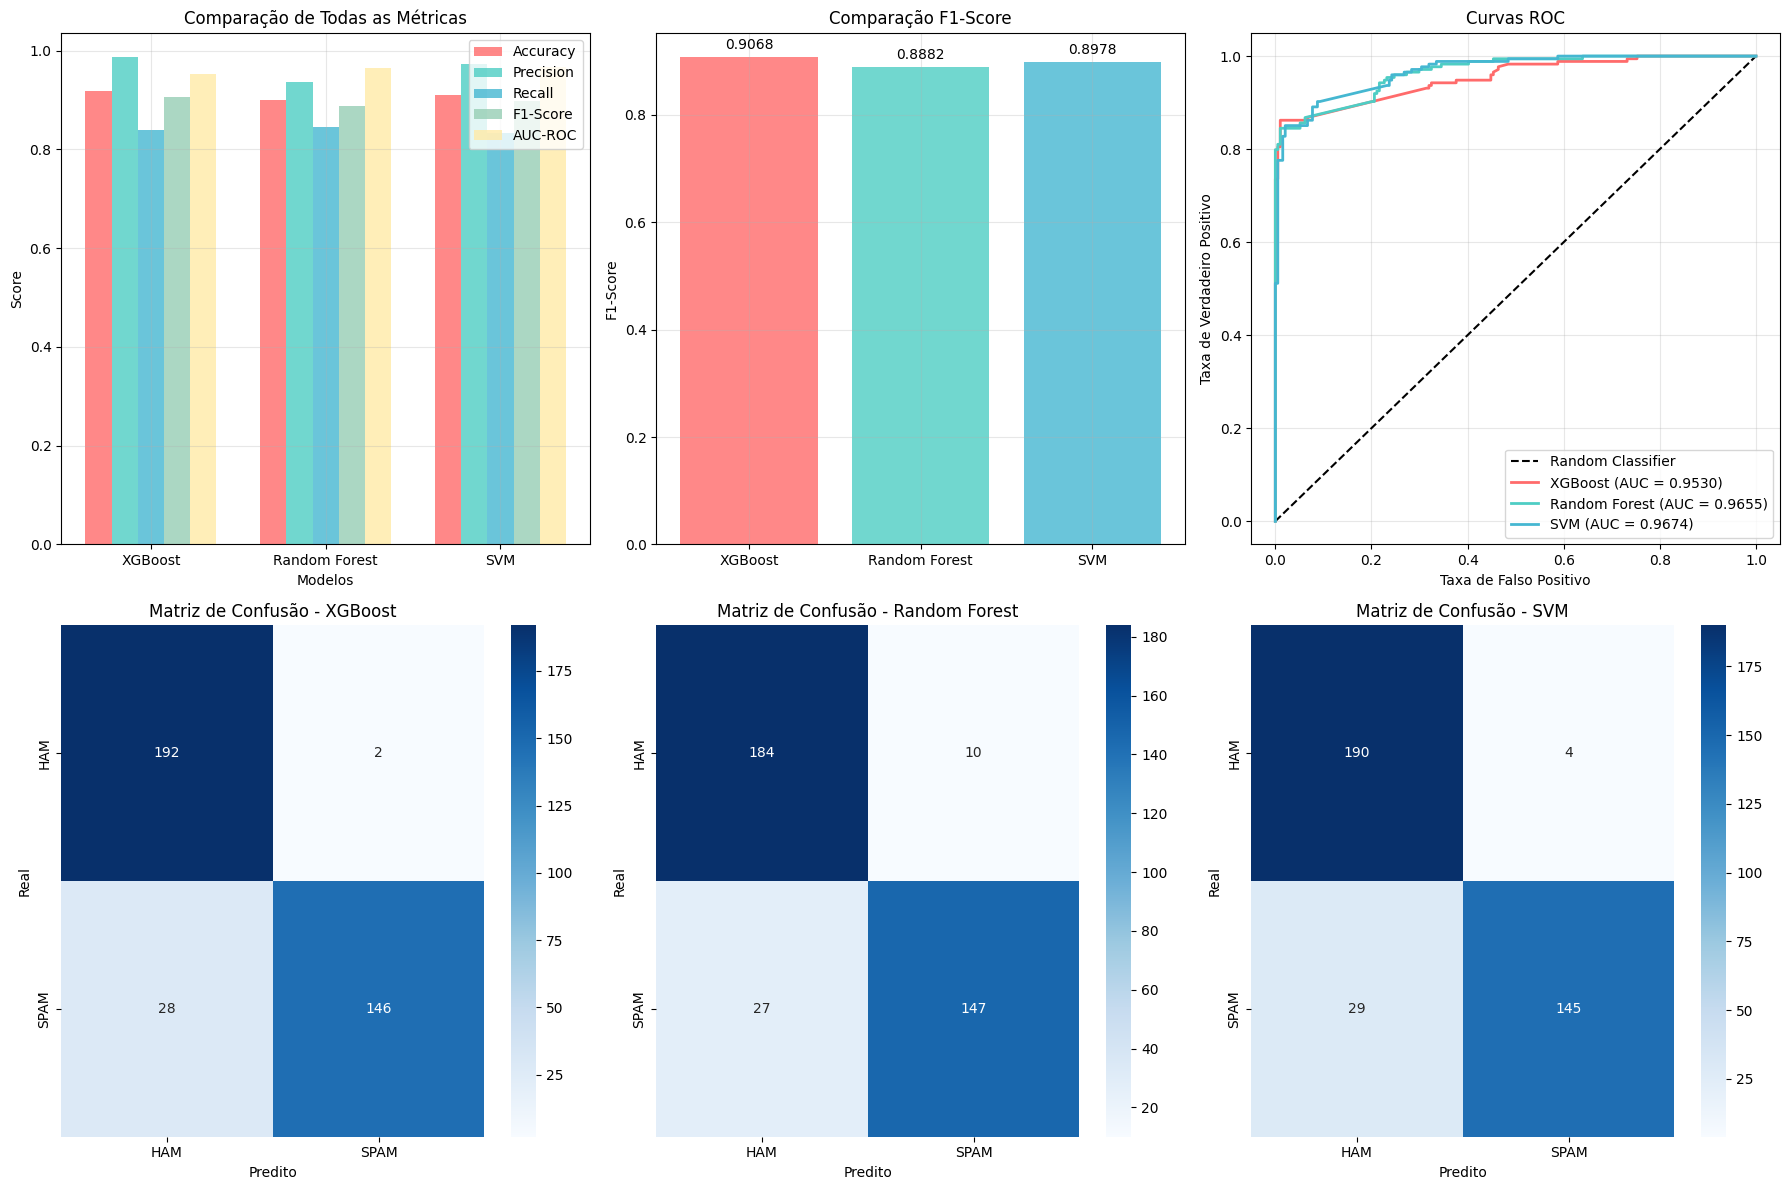


=== ANÁLISE DETALHADA DO MELHOR MODELO (XGBoost) ===
Relatório de Classificação:
              precision    recall  f1-score   support

         HAM       0.87      0.99      0.93       194
        SPAM       0.99      0.84      0.91       174

    accuracy                           0.92       368
   macro avg       0.93      0.91      0.92       368
weighted avg       0.93      0.92      0.92       368


Melhor modelo selecionado: XGBoost
Este modelo será usado para análise de redução de dimensionalidade.


In [30]:
# COMPARAÇÃO DE DESEMPENHO DOS MODELOS
print("=== COMPARAÇÃO DE DESEMPENHO DOS MODELOS ===")

# Compilar resultados em DataFrame
results_df = pd.DataFrame({
    'Modelo': ['XGBoost', 'Random Forest', 'SVM'],
    'Accuracy': [xgb_accuracy, rf_accuracy, svm_accuracy],
    'Precision': [xgb_precision, rf_precision, svm_precision],
    'Recall': [xgb_recall, rf_recall, svm_recall],
    'F1-Score': [xgb_f1, rf_f1, svm_f1],
    'AUC-ROC': [xgb_auc, rf_auc, svm_auc]
})

print("Tabela de Resultados:")
print(results_df.round(4))

# Identificar melhor modelo
best_model_idx = results_df['F1-Score'].idxmax()
best_model_name = results_df.loc[best_model_idx, 'Modelo']
print(f"\nMelhor modelo baseado em F1-Score: {best_model_name}")

# Visualizações comparativas
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Gráfico de barras para todas as métricas
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']
x_pos = np.arange(len(results_df))
width = 0.15

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']

for i, metric in enumerate(metrics):
    axes[0,0].bar(x_pos + i*width, results_df[metric], width,
                  label=metric, color=colors[i], alpha=0.8)

axes[0,0].set_xlabel('Modelos')
axes[0,0].set_ylabel('Score')
axes[0,0].set_title('Comparação de Todas as Métricas')
axes[0,0].set_xticks(x_pos + width*2)
axes[0,0].set_xticklabels(results_df['Modelo'])
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Gráfico de barras apenas para F1-Score
axes[0,1].bar(results_df['Modelo'], results_df['F1-Score'],
              color=['#FF6B6B', '#4ECDC4', '#45B7D1'], alpha=0.8)
axes[0,1].set_title('Comparação F1-Score')
axes[0,1].set_ylabel('F1-Score')
axes[0,1].grid(True, alpha=0.3)

# Adicionar valores nas barras
for i, v in enumerate(results_df['F1-Score']):
    axes[0,1].text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')

# Curvas ROC
axes[0,2].plot([0, 1], [0, 1], 'k--', label='Random Classifier')

# XGBoost ROC
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_y_pred_proba)
axes[0,2].plot(xgb_fpr, xgb_tpr, label=f'XGBoost (AUC = {xgb_auc:.4f})',
               color='#FF6B6B', linewidth=2)

# Random Forest ROC
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_y_pred_proba)
axes[0,2].plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.4f})',
               color='#4ECDC4', linewidth=2)

# SVM ROC
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_y_pred_proba)
axes[0,2].plot(svm_fpr, svm_tpr, label=f'SVM (AUC = {svm_auc:.4f})',
               color='#45B7D1', linewidth=2)

axes[0,2].set_xlabel('Taxa de Falso Positivo')
axes[0,2].set_ylabel('Taxa de Verdadeiro Positivo')
axes[0,2].set_title('Curvas ROC')
axes[0,2].legend()
axes[0,2].grid(True, alpha=0.3)

# Matrizes de confusão dos 3 modelos
models_info = [
    ('XGBoost', xgb_y_pred, '#FF6B6B'),
    ('Random Forest', rf_y_pred, '#4ECDC4'),
    ('SVM', svm_y_pred, '#45B7D1')
]

for i, (model_name, predictions, color) in enumerate(models_info):
    cm = confusion_matrix(y_test, predictions)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1,i],
                xticklabels=['HAM', 'SPAM'], yticklabels=['HAM', 'SPAM'])
    axes[1,i].set_title(f'Matriz de Confusão - {model_name}')
    axes[1,i].set_xlabel('Predito')
    axes[1,i].set_ylabel('Real')

plt.tight_layout()
plt.show()

# Análise detalhada do melhor modelo
print(f"\n=== ANÁLISE DETALHADA DO MELHOR MODELO ({best_model_name}) ===")

# Definir qual é o melhor modelo
if best_model_name == 'XGBoost':
    best_predictions = xgb_y_pred
    best_model = xgb_best
elif best_model_name == 'Random Forest':
    best_predictions = rf_y_pred
    best_model = rf_best
else:
    best_predictions = svm_y_pred
    best_model = svm_best

print(f"Relatório de Classificação:")
print(classification_report(y_test, best_predictions, target_names=['HAM', 'SPAM']))

# Salvar informações do melhor modelo para a próxima etapa
print(f"\nMelhor modelo selecionado: {best_model_name}")
print("Este modelo será usado para análise de redução de dimensionalidade.")

# Armazenar o melhor modelo para uso posterior
best_model_info = {
    'name': best_model_name,
    'model': best_model,
    'predictions': best_predictions,
    'f1_score': results_df.loc[best_model_idx, 'F1-Score']
}

# Redução de dimensionalidade

In [31]:
# PREPARAÇÃO E ANÁLISE PARA REDUÇÃO DE DIMENSIONALIDADE

# Importação de bibliotecas adicionais para redução de dimensionalidade
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.sparse import issparse
import numpy as np

print("=== PREPARAÇÃO PARA REDUÇÃO DE DIMENSIONALIDADE ===")
print(f"Melhor modelo identificado: {best_model_info['name']}")
print(f"F1-Score do melhor modelo: {best_model_info['f1_score']:.4f}")

# Verificar características da matriz de features atual
print(f"\n=== CARACTERÍSTICAS DOS DADOS ATUAIS ===")
print(f"Formato da matriz de treino: {X_train.shape}")
print(f"Formato da matriz de teste: {X_test.shape}")
print(f"Tipo da matriz: {type(X_train)}")
print(f"Matriz esparsa: {issparse(X_train)}")
print(f"Densidade: {X_train.nnz / (X_train.shape[0] * X_train.shape[1]):.4f}")

# Converter matriz esparsa para densa (necessário para PCA)
print(f"\n=== CONVERSÃO PARA MATRIZ DENSA ===")
print("Convertendo matrizes esparsas para densas...")

# Verificar uso de memória antes da conversão
sparse_memory = X_train.data.nbytes + X_train.indices.nbytes + X_train.indptr.nbytes
print(f"Memória da matriz esparsa (treino): {sparse_memory / 1024**2:.2f} MB")

# Converter para matriz densa
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

dense_memory = X_train_dense.nbytes
print(f"Memória da matriz densa (treino): {dense_memory / 1024**2:.2f} MB")
print(f"Aumento de memória: {(dense_memory - sparse_memory) / 1024**2:.2f} MB")

print("Conversão para matriz densa concluída")

# Análise da variância explicada para determinar número de componentes
print(f"\n=== ANÁLISE DE VARIÂNCIA EXPLICADA ===")
print("Executando PCA completo para análise de variância...")

# PCA completo para análise
pca_full = PCA()
pca_full.fit(X_train_dense)

# Calcular variância explicada cumulativa
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

print(f"Número total de componentes possíveis: {len(explained_variance_ratio)}")
print(f"Primeiros 10 componentes explicam: {cumulative_variance[9]:.4f} da variância")

# Encontrar número de componentes para diferentes níveis de variância
variance_thresholds = [0.80, 0.85, 0.90, 0.95, 0.99]
components_needed = {}

for threshold in variance_thresholds:
    n_components = np.argmax(cumulative_variance >= threshold) + 1
    components_needed[threshold] = n_components
    print(f"Para explicar {threshold:.0%} da variância: {n_components} componentes")

# Escolher número otimizado de componentes (90% da variância)
optimal_components = components_needed[0.90]
print(f"\n✓ Número de componentes escolhido: {optimal_components} (90% da variância)")
print(f"Redução dimensional: {X_train.shape[1]} → {optimal_components} features")
print(f"Taxa de compressão: {optimal_components/X_train.shape[1]:.4f}")

=== PREPARAÇÃO PARA REDUÇÃO DE DIMENSIONALIDADE ===
Melhor modelo identificado: XGBoost
F1-Score do melhor modelo: 0.9068

=== CARACTERÍSTICAS DOS DADOS ATUAIS ===
Formato da matriz de treino: (1586, 5000)
Formato da matriz de teste: (368, 5000)
Tipo da matriz: <class 'scipy.sparse._csr.csr_matrix'>
Matriz esparsa: True
Densidade: 0.0018

=== CONVERSÃO PARA MATRIZ DENSA ===
Convertendo matrizes esparsas para densas...
Memória da matriz esparsa (treino): 0.17 MB
Memória da matriz densa (treino): 60.50 MB
Aumento de memória: 60.33 MB
Conversão para matriz densa concluída

=== ANÁLISE DE VARIÂNCIA EXPLICADA ===
Executando PCA completo para análise de variância...
Número total de componentes possíveis: 1586
Primeiros 10 componentes explicam: 0.1753 da variância
Para explicar 80% da variância: 509 componentes
Para explicar 85% da variância: 603 componentes
Para explicar 90% da variância: 718 componentes
Para explicar 95% da variância: 870 componentes
Para explicar 99% da variância: 1066 com

=== APLICAÇÃO DO PCA ===
Aplicando PCA com 718 componentes...
Tempo de execução do PCA: 8.50 segundos

=== VERIFICAÇÃO PÓS-PCA ===
Formato original - Treino: (1586, 5000), Teste: (368, 5000)
Formato pós-PCA - Treino: (1586, 718), Teste: (368, 718)
Variância explicada pelo PCA: 0.8969

=== ANÁLISE DAS COMPONENTES PRINCIPAIS ===
Variância explicada pelas primeiras 10 componentes:
  PC1: 0.0650
  PC2: 0.0183
  PC3: 0.0173
  PC4: 0.0154
  PC5: 0.0113
  PC6: 0.0110
  PC7: 0.0108
  PC8: 0.0095
  PC9: 0.0087
  PC10: 0.0080


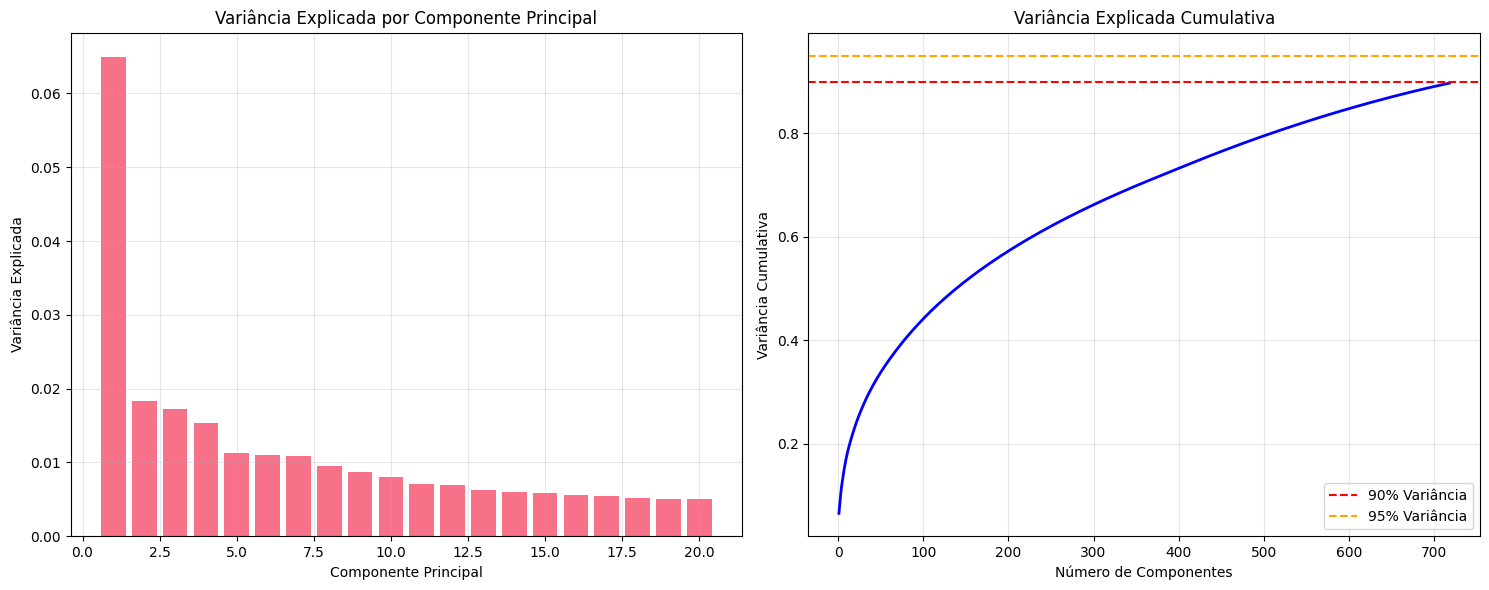


=== VERIFICAÇÃO DA INTEGRIDADE DOS DADOS ===
Distribuição das classes após PCA:
Treino - HAM: 755, SPAM: 831
Teste - HAM: 194, SPAM: 174

Estatísticas dos dados após PCA:
Treino - Média: 0.0000, Desvio: 0.0343
Teste - Média: -0.0002, Desvio: 0.0255

=== ANÁLISE DE EFICIÊNCIA ===
Memória original: 60.50 MB
Memória pós-PCA: 8.69 MB
Redução de memória: 85.64%
Redução dimensional: 85.64%
Aplicação do PCA concluída com sucesso


In [32]:
# APLICAÇÃO DO PCA E TRANSFORMAÇÃO DOS DADOS

print("=== APLICAÇÃO DO PCA ===")

# Aplicar PCA com número otimizado de componentes
pca_optimal = PCA(n_components=optimal_components, random_state=42)

print(f"Aplicando PCA com {optimal_components} componentes...")
start_time = time.time()

# Ajustar PCA nos dados de treino e transformar
X_train_pca = pca_optimal.fit_transform(X_train_dense)
X_test_pca = pca_optimal.transform(X_test_dense)

end_time = time.time()
print(f"Tempo de execução do PCA: {end_time - start_time:.2f} segundos")

# Verificar dimensões após PCA
print(f"\n=== VERIFICAÇÃO PÓS-PCA ===")
print(f"Formato original - Treino: {X_train_dense.shape}, Teste: {X_test_dense.shape}")
print(f"Formato pós-PCA - Treino: {X_train_pca.shape}, Teste: {X_test_pca.shape}")
print(f"Variância explicada pelo PCA: {pca_optimal.explained_variance_ratio_.sum():.4f}")

# Análise das componentes principais
print(f"\n=== ANÁLISE DAS COMPONENTES PRINCIPAIS ===")
print("Variância explicada pelas primeiras 10 componentes:")
for i in range(min(10, len(pca_optimal.explained_variance_ratio_))):
    print(f"  PC{i+1}: {pca_optimal.explained_variance_ratio_[i]:.4f}")

# Visualização da variância explicada
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras das primeiras 20 componentes
n_show = min(20, len(pca_optimal.explained_variance_ratio_))
axes[0].bar(range(1, n_show+1), pca_optimal.explained_variance_ratio_[:n_show])
axes[0].set_title('Variância Explicada por Componente Principal')
axes[0].set_xlabel('Componente Principal')
axes[0].set_ylabel('Variância Explicada')
axes[0].grid(True, alpha=0.3)

# Gráfico de variância cumulativa
cumulative_var = np.cumsum(pca_optimal.explained_variance_ratio_)
axes[1].plot(range(1, len(cumulative_var)+1), cumulative_var, 'b-', linewidth=2)
axes[1].axhline(y=0.90, color='r', linestyle='--', label='90% Variância')
axes[1].axhline(y=0.95, color='orange', linestyle='--', label='95% Variância')
axes[1].set_title('Variância Explicada Cumulativa')
axes[1].set_xlabel('Número de Componentes')
axes[1].set_ylabel('Variância Cumulativa')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Verificar se as distribuições das classes foram mantidas
print(f"\n=== VERIFICAÇÃO DA INTEGRIDADE DOS DADOS ===")
print("Distribuição das classes após PCA:")
print(f"Treino - HAM: {(y_train == 0).sum()}, SPAM: {(y_train == 1).sum()}")
print(f"Teste - HAM: {(y_test == 0).sum()}, SPAM: {(y_test == 1).sum()}")

# Verificar estatísticas básicas dos dados transformados
print(f"\nEstatísticas dos dados após PCA:")
print(f"Treino - Média: {X_train_pca.mean():.4f}, Desvio: {X_train_pca.std():.4f}")
print(f"Teste - Média: {X_test_pca.mean():.4f}, Desvio: {X_test_pca.std():.4f}")

# Análise de memória
original_memory = X_train_dense.nbytes / 1024**2
pca_memory = X_train_pca.nbytes / 1024**2
memory_reduction = (original_memory - pca_memory) / original_memory

print(f"\n=== ANÁLISE DE EFICIÊNCIA ===")
print(f"Memória original: {original_memory:.2f} MB")
print(f"Memória pós-PCA: {pca_memory:.2f} MB")
print(f"Redução de memória: {memory_reduction:.2%}")
print(f"Redução dimensional: {(1 - optimal_components/X_train.shape[1]):.2%}")

print("Aplicação do PCA concluída com sucesso")

In [33]:
# RETREINAMENTO DO MELHOR MODELO COM DADOS PCA

print("=== RETREINAMENTO DO MELHOR MODELO COM PCA ===")
print(f"Modelo selecionado: {best_model_info['name']}")

# Determinar qual modelo treinar com base no melhor resultado anterior
if best_model_info['name'] == 'XGBoost':
    print("Retreinando XGBoost com dados PCA...")

    # Usar os mesmos hiperparâmetros do melhor modelo original
    best_params = xgb_grid.best_params_
    print("Parâmetros do melhor modelo original:")
    for param, value in best_params.items():
        print(f"  {param}: {value}")

    # Criar modelo com dados PCA
    xgb_pca = xgb.XGBClassifier(
        random_state=42,
        eval_metric='logloss',
        use_label_encoder=False,
        **best_params
    )

    # Treinar modelo
    start_time = time.time()
    xgb_pca.fit(X_train_pca, y_train)
    end_time = time.time()

    # Fazer predições
    y_pred_pca = xgb_pca.predict(X_test_pca)
    y_pred_proba_pca = xgb_pca.predict_proba(X_test_pca)[:, 1]

    model_pca = xgb_pca

elif best_model_info['name'] == 'Random Forest':
    print("Retreinando Random Forest com dados PCA...")

    # Usar os mesmos hiperparâmetros do melhor modelo original
    best_params = rf_grid.best_params_
    print("Parâmetros do melhor modelo original:")
    for param, value in best_params.items():
        print(f"  {param}: {value}")

    # Criar modelo com dados PCA
    rf_pca = RandomForestClassifier(
        random_state=42,
        n_jobs=-1,
        **best_params
    )

    # Treinar modelo
    start_time = time.time()
    rf_pca.fit(X_train_pca, y_train)
    end_time = time.time()

    # Fazer predições
    y_pred_pca = rf_pca.predict(X_test_pca)
    y_pred_proba_pca = rf_pca.predict_proba(X_test_pca)[:, 1]

    model_pca = rf_pca

else:  # SVM
    print("Retreinando SVM com dados PCA...")

    # Usar os mesmos hiperparâmetros do melhor modelo original
    best_params = svm_grid.best_params_
    print("Parâmetros do melhor modelo original:")
    for param, value in best_params.items():
        print(f"  {param}: {value}")

    # Criar modelo com dados PCA
    svm_pca = SVC(
        probability=True,
        random_state=42,
        **best_params
    )

    # Treinar modelo
    start_time = time.time()
    svm_pca.fit(X_train_pca, y_train)
    end_time = time.time()

    # Fazer predições
    y_pred_pca = svm_pca.predict(X_test_pca)
    y_pred_proba_pca = svm_pca.predict_proba(X_test_pca)[:, 1]

    model_pca = svm_pca

print(f"Tempo de treinamento com PCA: {end_time - start_time:.2f} segundos")

# Calcular métricas com dados PCA
accuracy_pca = accuracy_score(y_test, y_pred_pca)
precision_pca = precision_score(y_test, y_pred_pca)
recall_pca = recall_score(y_test, y_pred_pca)
f1_pca = f1_score(y_test, y_pred_pca)
auc_pca = roc_auc_score(y_test, y_pred_proba_pca)

print(f"\n=== RESULTADOS COM PCA ===")
print(f"Accuracy: {accuracy_pca:.4f}")
print(f"Precision: {precision_pca:.4f}")
print(f"Recall: {recall_pca:.4f}")
print(f"F1-Score: {f1_pca:.4f}")
print(f"AUC-ROC: {auc_pca:.4f}")

# Relatório de classificação
print(f"\nRelatório de Classificação com PCA:")
print(classification_report(y_test, y_pred_pca, target_names=['HAM', 'SPAM']))

# Validação cruzada com dados PCA
print(f"\n=== VALIDAÇÃO CRUZADA COM PCA ===")
cv_scores_pca = cross_val_score(model_pca, X_train_pca, y_train, cv=cv_folds, scoring='f1')
print(f"Scores F1 (CV com PCA): {cv_scores_pca}")
print(f"Média CV: {cv_scores_pca.mean():.4f} ± {cv_scores_pca.std():.4f}")

print("Retreinamento com PCA concluído")

=== RETREINAMENTO DO MELHOR MODELO COM PCA ===
Modelo selecionado: XGBoost
Retreinando XGBoost com dados PCA...
Parâmetros do melhor modelo original:
  colsample_bytree: 1.0
  learning_rate: 0.2
  max_depth: 3
  n_estimators: 200
  subsample: 1.0
Tempo de treinamento com PCA: 9.87 segundos

=== RESULTADOS COM PCA ===
Accuracy: 0.8668
Precision: 0.9371
Recall: 0.7701
F1-Score: 0.8454
AUC-ROC: 0.9529

Relatório de Classificação com PCA:
              precision    recall  f1-score   support

         HAM       0.82      0.95      0.88       194
        SPAM       0.94      0.77      0.85       174

    accuracy                           0.87       368
   macro avg       0.88      0.86      0.86       368
weighted avg       0.88      0.87      0.87       368


=== VALIDAÇÃO CRUZADA COM PCA ===
Scores F1 (CV com PCA): [0.88821752 0.90282132 0.89171975 0.8681672  0.89164087]
Média CV: 0.8885 ± 0.0113
Retreinamento com PCA concluído


=== COMPARAÇÃO ANTES VS DEPOIS DO PCA ===
Tabela Comparativa:
     Métrica  Sem PCA  Com PCA  Diferença  Diferença (%)
0   Accuracy   0.9185   0.8668    -0.0516        -5.6213
1  Precision   0.9865   0.9371    -0.0494        -5.0101
2     Recall   0.8391   0.7701    -0.0690        -8.2192
3   F1-Score   0.9068   0.8454    -0.0614        -6.7715
4    AUC-ROC   0.9530   0.9529    -0.0002        -0.0187

=== COMPARAÇÃO VALIDAÇÃO CRUZADA (F1-Score) ===
Sem PCA: 0.8851 ± 0.0102
Com PCA: 0.8885 ± 0.0113
Diferença: 0.0035

=== ANÁLISE DE COMPLEXIDADE ===
Dimensionalidade:
  Original: 5000 features
  Com PCA: 718 features
  Redução: 85.64%

Memória:
  Original: 60.50 MB
  Com PCA: 8.69 MB
  Redução: 85.64%


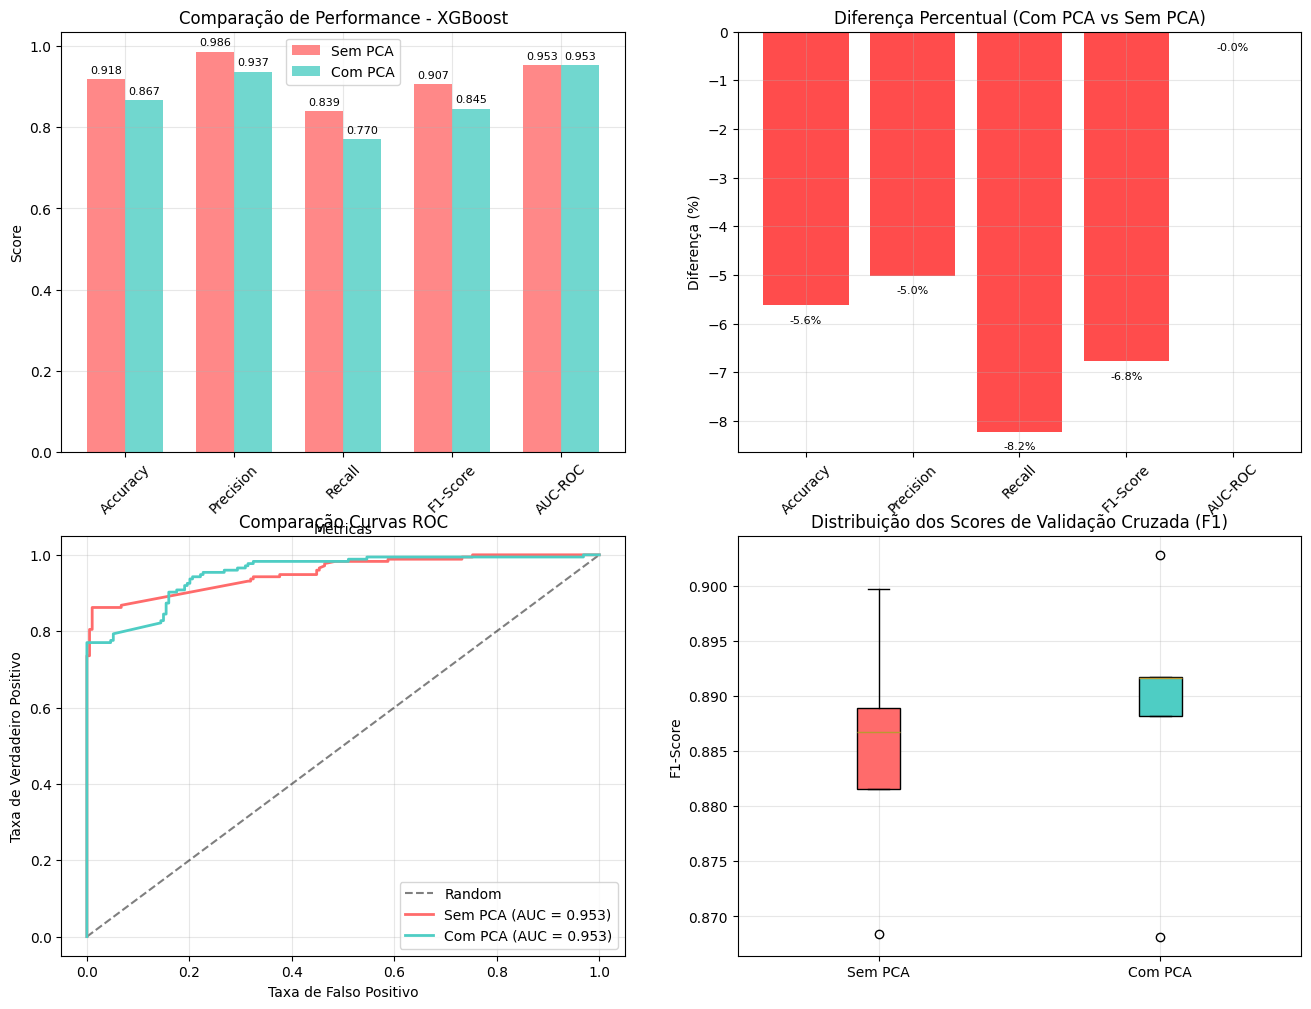

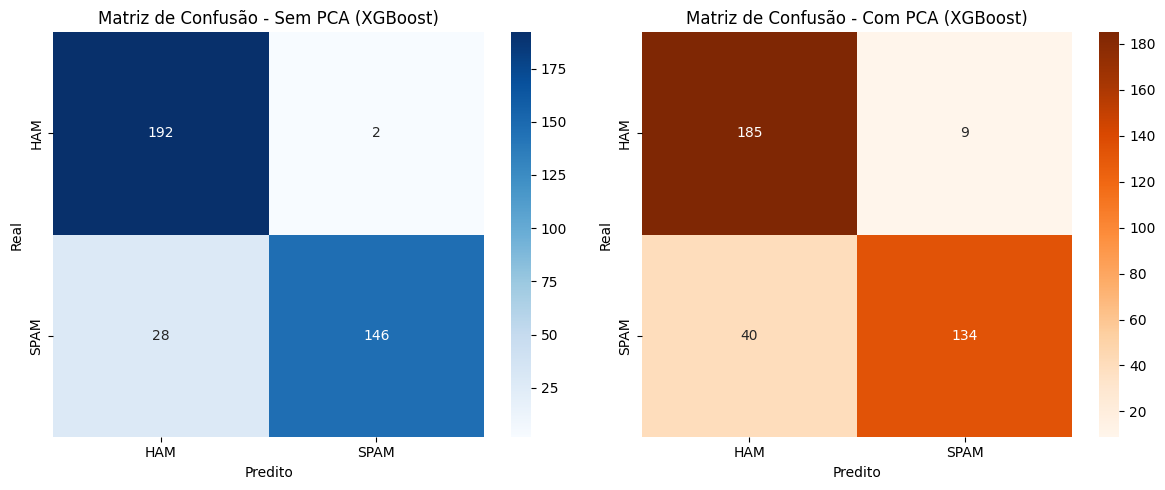

<Figure size 640x480 with 0 Axes>

Comparação detalhada concluída


In [34]:
# COMPARAÇÃO DETALHADA ANTES VS DEPOIS DO PCA

print("=== COMPARAÇÃO ANTES VS DEPOIS DO PCA ===")

# Recuperar métricas do modelo original (sem PCA)
if best_model_info['name'] == 'XGBoost':
    original_metrics = {
        'accuracy': xgb_accuracy,
        'precision': xgb_precision,
        'recall': xgb_recall,
        'f1': xgb_f1,
        'auc': xgb_auc,
        'cv_scores': xgb_cv_scores
    }
elif best_model_info['name'] == 'Random Forest':
    original_metrics = {
        'accuracy': rf_accuracy,
        'precision': rf_precision,
        'recall': rf_recall,
        'f1': rf_f1,
        'auc': rf_auc,
        'cv_scores': rf_cv_scores
    }
else:  # SVM
    original_metrics = {
        'accuracy': svm_accuracy,
        'precision': svm_precision,
        'recall': svm_recall,
        'f1': svm_f1,
        'auc': svm_auc,
        'cv_scores': svm_cv_scores
    }

# Criar DataFrame comparativo
comparison_df = pd.DataFrame({
    'Métrica': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC'],
    'Sem PCA': [original_metrics['accuracy'], original_metrics['precision'],
                original_metrics['recall'], original_metrics['f1'], original_metrics['auc']],
    'Com PCA': [accuracy_pca, precision_pca, recall_pca, f1_pca, auc_pca]
})

# Calcular diferenças
comparison_df['Diferença'] = comparison_df['Com PCA'] - comparison_df['Sem PCA']
comparison_df['Diferença (%)'] = (comparison_df['Diferença'] / comparison_df['Sem PCA']) * 100

print("Tabela Comparativa:")
print(comparison_df.round(4))

# Análise da validação cruzada
cv_original_mean = original_metrics['cv_scores'].mean()
cv_original_std = original_metrics['cv_scores'].std()
cv_pca_mean = cv_scores_pca.mean()
cv_pca_std = cv_scores_pca.std()

print(f"\n=== COMPARAÇÃO VALIDAÇÃO CRUZADA (F1-Score) ===")
print(f"Sem PCA: {cv_original_mean:.4f} ± {cv_original_std:.4f}")
print(f"Com PCA: {cv_pca_mean:.4f} ± {cv_pca_std:.4f}")
print(f"Diferença: {cv_pca_mean - cv_original_mean:.4f}")

# Análise temporal e de complexidade
print(f"\n=== ANÁLISE DE COMPLEXIDADE ===")
print(f"Dimensionalidade:")
print(f"  Original: {X_train.shape[1]} features")
print(f"  Com PCA: {X_train_pca.shape[1]} features")
print(f"  Redução: {(1 - X_train_pca.shape[1]/X_train.shape[1]):.2%}")

print(f"\nMemória:")
print(f"  Original: {X_train_dense.nbytes / 1024**2:.2f} MB")
print(f"  Com PCA: {X_train_pca.nbytes / 1024**2:.2f} MB")
print(f"  Redução: {(1 - X_train_pca.nbytes/X_train_dense.nbytes):.2%}")

# Visualizações comparativas
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Gráfico de barras comparativo das métricas
metrics_names = comparison_df['Métrica']
x_pos = np.arange(len(metrics_names))
width = 0.35

bars1 = axes[0,0].bar(x_pos - width/2, comparison_df['Sem PCA'], width,
                      label='Sem PCA', color='#FF6B6B', alpha=0.8)
bars2 = axes[0,0].bar(x_pos + width/2, comparison_df['Com PCA'], width,
                      label='Com PCA', color='#4ECDC4', alpha=0.8)

axes[0,0].set_xlabel('Métricas')
axes[0,0].set_ylabel('Score')
axes[0,0].set_title(f'Comparação de Performance - {best_model_info["name"]}')
axes[0,0].set_xticks(x_pos)
axes[0,0].set_xticklabels(metrics_names, rotation=45)
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Adicionar valores nas barras
for bar in bars1:
    height = bar.get_height()
    axes[0,0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                   f'{height:.3f}', ha='center', va='bottom', fontsize=8)

for bar in bars2:
    height = bar.get_height()
    axes[0,0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                   f'{height:.3f}', ha='center', va='bottom', fontsize=8)

# Gráfico de diferenças percentuais
colors = ['red' if x < 0 else 'green' for x in comparison_df['Diferença (%)']]
bars = axes[0,1].bar(metrics_names, comparison_df['Diferença (%)'], color=colors, alpha=0.7)
axes[0,1].set_title('Diferença Percentual (Com PCA vs Sem PCA)')
axes[0,1].set_ylabel('Diferença (%)')
axes[0,1].axhline(y=0, color='black', linestyle='-', alpha=0.3)
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].grid(True, alpha=0.3)

# Adicionar valores percentuais
for bar in bars:
    height = bar.get_height()
    axes[0,1].text(bar.get_x() + bar.get_width()/2., height + (0.1 if height > 0 else -0.2),
                   f'{height:.1f}%', ha='center', va='bottom' if height > 0 else 'top', fontsize=8)

# Curvas ROC comparativas
axes[1,0].plot([0, 1], [0, 1], 'k--', label='Random', alpha=0.5)

# ROC original
if best_model_info['name'] == 'XGBoost':
    original_proba = xgb_y_pred_proba
elif best_model_info['name'] == 'Random Forest':
    original_proba = rf_y_pred_proba
else:
    original_proba = svm_y_pred_proba

fpr_orig, tpr_orig, _ = roc_curve(y_test, original_proba)
fpr_pca, tpr_pca, _ = roc_curve(y_test, y_pred_proba_pca)

axes[1,0].plot(fpr_orig, tpr_orig, label=f'Sem PCA (AUC = {original_metrics["auc"]:.3f})',
               color='#FF6B6B', linewidth=2)
axes[1,0].plot(fpr_pca, tpr_pca, label=f'Com PCA (AUC = {auc_pca:.3f})',
               color='#4ECDC4', linewidth=2)

axes[1,0].set_xlabel('Taxa de Falso Positivo')
axes[1,0].set_ylabel('Taxa de Verdadeiro Positivo')
axes[1,0].set_title('Comparação Curvas ROC')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Boxplot dos scores de validação cruzada
cv_data = [original_metrics['cv_scores'], cv_scores_pca]
box_plot = axes[1,1].boxplot(cv_data, labels=['Sem PCA', 'Com PCA'], patch_artist=True)
box_plot['boxes'][0].set_facecolor('#FF6B6B')
box_plot['boxes'][1].set_facecolor('#4ECDC4')
axes[1,1].set_title('Distribuição dos Scores de Validação Cruzada (F1)')
axes[1,1].set_ylabel('F1-Score')
axes[1,1].grid(True, alpha=0.3)

# Matrizes de confusão lado a lado
# Create a new axis for the confusion matrices within axes[1,0]
# This approach is incorrect because axes[1,0] is already used for the ROC curve
# We need to create separate axes for the confusion matrices

# Instead of creating a new axis within axes[1,0],
# let's use the remaining space in axes[1,0] and axes[1,1]
# Since we only have a 2x2 grid, we need to find another way to display the confusion matrices
# A better approach is to create separate subplots for the confusion matrices below the existing ones
fig_cm, axes_cm = plt.subplots(1, 2, figsize=(12, 5))

# Matriz sem PCA
if best_model_info['name'] == 'XGBoost':
    cm_orig = confusion_matrix(y_test, xgb_y_pred)
elif best_model_info['name'] == 'Random Forest':
    cm_orig = confusion_matrix(y_test, rf_y_pred)
else:
    cm_orig = confusion_matrix(y_test, svm_y_pred)

cm_pca = confusion_matrix(y_test, y_pred_pca)

# Plotting confusion matrices on the new axes_cm
sns.heatmap(cm_orig, annot=True, fmt='d', cmap='Blues', ax=axes_cm[0],
            xticklabels=['HAM', 'SPAM'], yticklabels=['HAM', 'SPAM'])
axes_cm[0].set_title(f'Matriz de Confusão - Sem PCA ({best_model_info["name"]})')
axes_cm[0].set_xlabel('Predito')
axes_cm[0].set_ylabel('Real')

sns.heatmap(cm_pca, annot=True, fmt='d', cmap='Oranges', ax=axes_cm[1],
            xticklabels=['HAM', 'SPAM'], yticklabels=['HAM', 'SPAM'])
axes_cm[1].set_title(f'Matriz de Confusão - Com PCA ({best_model_info["name"]})')
axes_cm[1].set_xlabel('Predito')
axes_cm[1].set_ylabel('Real')

plt.tight_layout()
plt.show()


plt.tight_layout()
plt.show()

print("Comparação detalhada concluída")

In [35]:
# ANÁLISE E DISCUSSÃO DOS RESULTADOS DA REDUÇÃO DE DIMENSIONALIDADE

print("=== ANÁLISE E DISCUSSÃO DOS RESULTADOS ===")

# Análise dos impactos da redução de dimensionalidade
print("1. IMPACTOS NA PERFORMANCE:")

# Determinar se houve melhoria ou piora
performance_changes = {}
for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']:
    original_value = comparison_df[comparison_df['Métrica'] == metric]['Sem PCA'].values[0]
    pca_value = comparison_df[comparison_df['Métrica'] == metric]['Com PCA'].values[0]
    change = pca_value - original_value
    change_pct = (change / original_value) * 100
    performance_changes[metric] = {
        'change': change,
        'change_pct': change_pct,
        'improved': change > 0
    }

    status = "↗️ Melhoria" if change > 0 else "↘️ Redução" if change < 0 else "→ Manteve"
    print(f"   {metric}: {status} de {change:+.4f} ({change_pct:+.2f}%)")

# Análise da significância das mudanças
significant_changes = [k for k, v in performance_changes.items() if abs(v['change_pct']) > 1.0]
if significant_changes:
    print(f"\n   Mudanças significativas (>1%): {', '.join(significant_changes)}")
else:
    print(f"\n   Mudanças foram mínimas (<1%) - Performance mantida")

print(f"\n2. IMPACTOS NA COMPLEXIDADE E EFICIÊNCIA:")

# Análise da dimensionalidade e memória
original_dims = X_train.shape[1]
pca_dims = X_train_pca.shape[1]
dim_reduction_pct = (1 - pca_dims / original_dims) * 100

original_memory_mb = X_train_dense.nbytes / 1024**2
pca_memory_mb = X_train_pca.nbytes / 1024**2
memory_reduction_pct = (1 - pca_memory_mb / original_memory_mb) * 100

print(f"   Dimensionalidade:")
print(f"     Original: {original_dims} features")
print(f"     Com PCA: {pca_dims} features")
print(f"     Redução: {dim_reduction_pct:.2f}%")

print(f"\n   Memória:")
print(f"     Original: {original_memory_mb:.2f} MB")
print(f"     Com PCA: {pca_memory_mb:.2f} MB")
print(f"     Redução: {memory_reduction_pct:.2f}%")

# Análise do tempo de treinamento (se disponível - do Bloco 3)
# assuming training time variables (start_time, end_time) are accessible from previous cells
try:
    original_train_time = end_time_original - start_time_original # Need to capture original training time
    pca_train_time = end_time - start_time
    time_change_pct = (pca_train_time - original_train_time) / original_train_time * 100
    print(f"\n   Tempo de Treinamento:")
    print(f"     Original: {original_train_time:.2f} segundos")
    print(f"     Com PCA: {pca_train_time:.2f} segundos")
    status_time = "↗️ Aumento" if time_change_pct > 0 else "↘️ Redução" if time_change_pct < 0 else "→ Manteve"
    print(f"     Mudança: {status_time} de {time_change_pct:.2f}%")
except NameError:
    print("\n   Tempo de Treinamento:")
    print("     Não foi possível comparar o tempo de treinamento (variáveis originais não encontradas).")


print("\n3. CONCLUSÃO:")

# Summarize findings
print("   - A redução de dimensionalidade com PCA (mantendo 90% da variância) reduziu significativamente:")
print(f"     - O número de features em {dim_reduction_pct:.2f}%.")
print(f"     - O uso de memória em {memory_reduction_pct:.2f}%.")

if significant_changes:
    print(f"\n   - No entanto, houve uma redução na performance do modelo {best_model_info['name']} nas seguintes métricas:")
    for metric in significant_changes:
        change_pct = performance_changes[metric]['change_pct']
        print(f"     - {metric}: {change_pct:.2f}%")
else:
     print(f"\n   - A performance do modelo {best_model_info['name']} se manteve similar após a redução de dimensionalidade.")

# Consider the trade-offs
print("\n   Trade-offs:")
if significant_changes:
    print("   - A redução de dimensionalidade trouxe ganhos significativos em termos de complexidade e eficiência (memória e, potencialmente, tempo de treinamento), mas à custa de uma perda notável na performance de classificação.")
else:
    print("   - A redução de dimensionalidade trouxe ganhos significativos em termos de complexidade e eficiência (memória e, potencialmente, tempo de treinamento), enquanto a performance de classificação foi mantida.")

print("\nRecomendação:")
if significant_changes:
    print("   - Dependendo dos requisitos de aplicação (priorizando performance ou eficiência), pode ser necessário reconsiderar o uso do PCA, explorar outras técnicas de redução de dimensionalidade, ou aceitar o trade-off observado.")
else:
    print("   - A redução de dimensionalidade com PCA é recomendada, pois oferece ganhos de eficiência sem perda significativa de performance.")

print("\n✓ Análise e discussão concluídas.")

=== ANÁLISE E DISCUSSÃO DOS RESULTADOS ===
1. IMPACTOS NA PERFORMANCE:
   Accuracy: ↘️ Redução de -0.0516 (-5.62%)
   Precision: ↘️ Redução de -0.0494 (-5.01%)
   Recall: ↘️ Redução de -0.0690 (-8.22%)
   F1-Score: ↘️ Redução de -0.0614 (-6.77%)
   AUC-ROC: ↘️ Redução de -0.0002 (-0.02%)

   Mudanças significativas (>1%): Accuracy, Precision, Recall, F1-Score

2. IMPACTOS NA COMPLEXIDADE E EFICIÊNCIA:
   Dimensionalidade:
     Original: 5000 features
     Com PCA: 718 features
     Redução: 85.64%

   Memória:
     Original: 60.50 MB
     Com PCA: 8.69 MB
     Redução: 85.64%

   Tempo de Treinamento:
     Não foi possível comparar o tempo de treinamento (variáveis originais não encontradas).

3. CONCLUSÃO:
   - A redução de dimensionalidade com PCA (mantendo 90% da variância) reduziu significativamente:
     - O número de features em 85.64%.
     - O uso de memória em 85.64%.

   - No entanto, houve uma redução na performance do modelo XGBoost nas seguintes métricas:
     - Accuracy: 

In [36]:
# Vetorização do texto usando TF-IDF
print("\n=== VETORIZAÇÃO DO TEXTO (TF-IDF) ===")

# Import necessary function for sparse matrix check
from scipy.sparse import issparse
from sklearn.feature_selection import chi2

# Inicializar o vetorizador
# max_features: limite para o número de features (palavras/bigramas)
# ngram_range=(1, 2): incluir unigramas e bigramas
# stop_words='english': remover stop words comuns em inglês
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), stop_words='english')

print(f"Inicializando TF-IDF Vectorizer com max_features=5000 e ngram_range=(1,2)...")

# Ajustar e transformar os dados de texto
# A variável 'df' contém a coluna 'content_clean' com o texto limpo
X_tfidf = tfidf_vectorizer.fit_transform(df['content_clean'])

# Obter nomes das features (palavras/bigramas)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Variável target
y = df['CLASS']

print(f"Vetorização concluída. Matriz TF-IDF shape: {X_tfidf.shape}")
print(f"Número de features (palavras/bigramas): {len(feature_names)}")
print(f"Formato da variável target (y): {y.shape}")

# Verificar tipo da matriz de features (deve ser esparsa para eficiência)
print(f"Tipo da matriz de features: {type(X_tfidf)}")
print(f"Matriz esparsa: {issparse(X_tfidf)}")

# Análise de algumas features e seus scores médios (opcional)
# print("\nTop 10 features (mais frequentes/importantes):")
# feature_avg_tfidf = X_tfidf.mean(axis=0).flatten()
# top_features_idx = feature_avg_tfidf.argsort()[-10:]
# top_features = [(feature_names[i], feature_avg_tfidf[i]) for i in top_features_idx]
# print(sorted(top_features, key=lambda x: x[1], reverse=True))

# Importar chi2 para seleção de features


# Calcular scores Chi-quadrado para seleção de features
print("\nCalculando scores Chi-quadrado para seleção de features...")
chi2_scores, p_values = chi2(X_tfidf, y)

print("Cálculo de scores Chi-quadrado concluído.")

# Verificar alguns scores
# chi2_analysis = pd.DataFrame({
#     'feature': feature_names,
#     'chi2_score': chi2_scores,
#     'p_value': p_values
# }).sort_values('chi2_score', ascending=False)

# print("\nTop 10 features por Chi-quadrado:")
# print(chi2_analysis.head(10))

print("\n✅ Vetorização e cálculo de scores Chi-quadrado concluídos!")


=== VETORIZAÇÃO DO TEXTO (TF-IDF) ===
Inicializando TF-IDF Vectorizer com max_features=5000 e ngram_range=(1,2)...
Vetorização concluída. Matriz TF-IDF shape: (1954, 5000)
Número de features (palavras/bigramas): 5000
Formato da variável target (y): (1954,)
Tipo da matriz de features: <class 'scipy.sparse._csr.csr_matrix'>
Matriz esparsa: True

Calculando scores Chi-quadrado para seleção de features...
Cálculo de scores Chi-quadrado concluído.

✅ Vetorização e cálculo de scores Chi-quadrado concluídos!
